In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as ss
import numpy as np
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.binary import BinaryEncoder
from sklearn.model_selection import train_test_split

pd.options.display.max_rows = 35
pd.options.display.max_columns = 35

df = pd.read_csv("carclaims.csv")
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


# Exploratory Data Analysis

### Dataset Summary

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

### Feature dimensions

In [3]:
df.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days:Policy-Accident        5
Days:Policy-Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange-Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
FraudFound                  2
dtype: int

### Checking for missing values

In [4]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64

##### Based on the statistics above, there are no missing values in the dataset

### Fraud Ratio

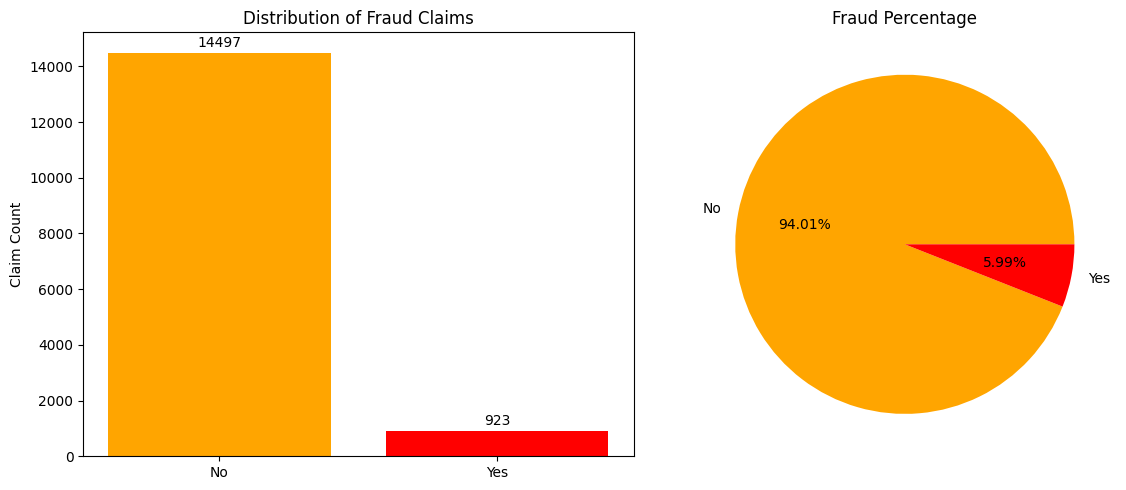

In [5]:

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

fraud_counts = df["FraudFound"].value_counts()
ax[0].bar(fraud_counts.index, fraud_counts.values, color=["orange", "red"])
ax[0].set_ylabel("Claim Count")
ax[0].set_title("Distribution of Fraud Claims")

# Annotate the bar heights with their counts
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() + 100), ha='center', va='bottom', fontsize=10, color='black')

# Plot the pie chart for the percentage of fraud and no fraud
fraud_percentage = df["FraudFound"].value_counts(normalize=True)
ax[1].pie(fraud_percentage, labels=fraud_percentage.index, autopct='%.2f%%', colors=["orange", "red"])
ax[1].set_title("Fraud Percentage")

plt.tight_layout()
plt.show()


In [6]:
ratio_of_fraud_vs_nonfraud = len(df[df['FraudFound'] == 'Yes']) / len(df[df['FraudFound'] == 'No'])
ratio_of_fraud_vs_nonfraud

0.06366834517486376

The ratio of fraud vs non-fraud transactions is 0.06366834517486376.

### Check duplicate rows

In [7]:
df.duplicated().sum()

0

##### There are no duplcated rows in the dataset

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


### Distribution Plots

array([[<Axes: title={'center': 'WeekOfMonth'}>,
        <Axes: title={'center': 'WeekOfMonthClaimed'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'PolicyNumber'}>],
       [<Axes: title={'center': 'RepNumber'}>,
        <Axes: title={'center': 'Deductible'}>,
        <Axes: title={'center': 'DriverRating'}>,
        <Axes: title={'center': 'Year'}>]], dtype=object)

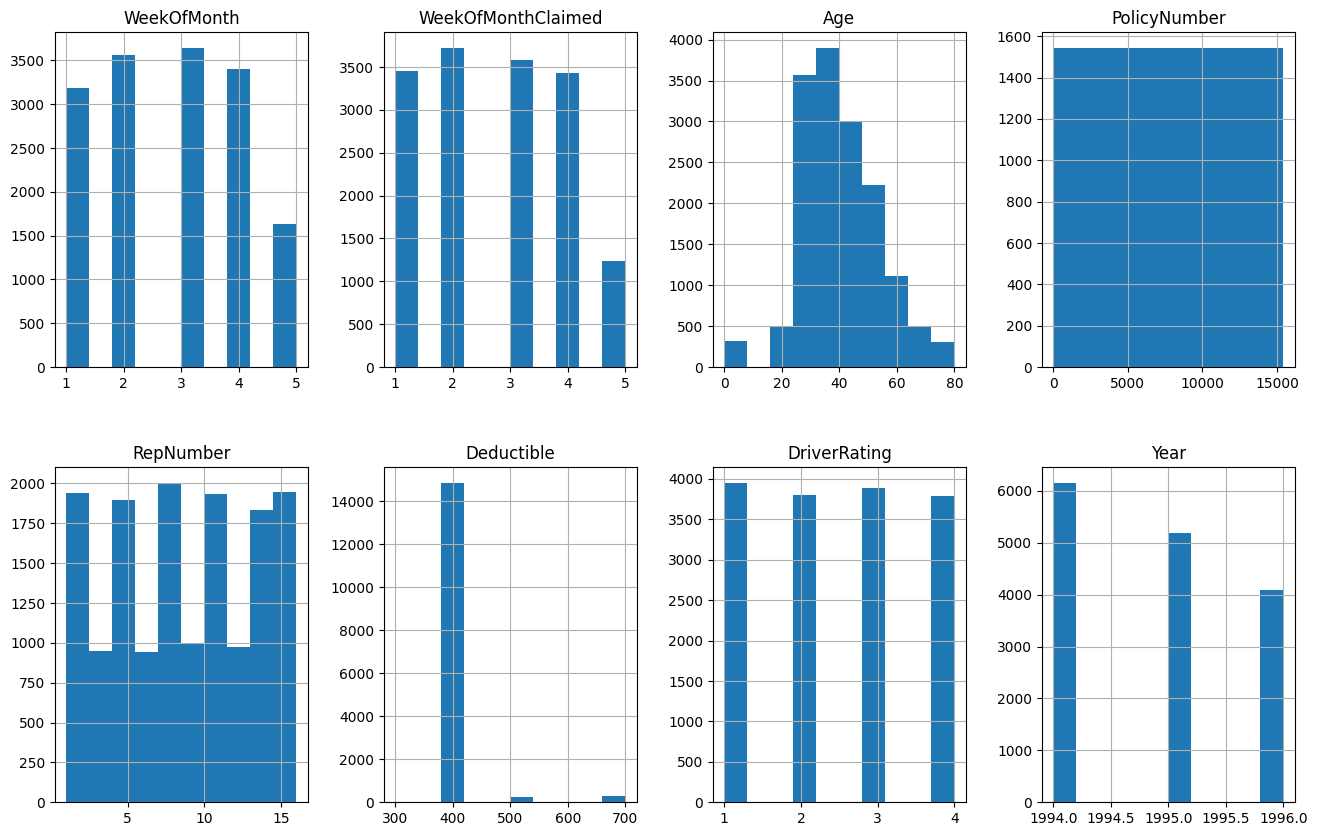

In [9]:
fig, axis = plt.subplots(2, 4, figsize=(16, 10))
df.hist(ax = axis)

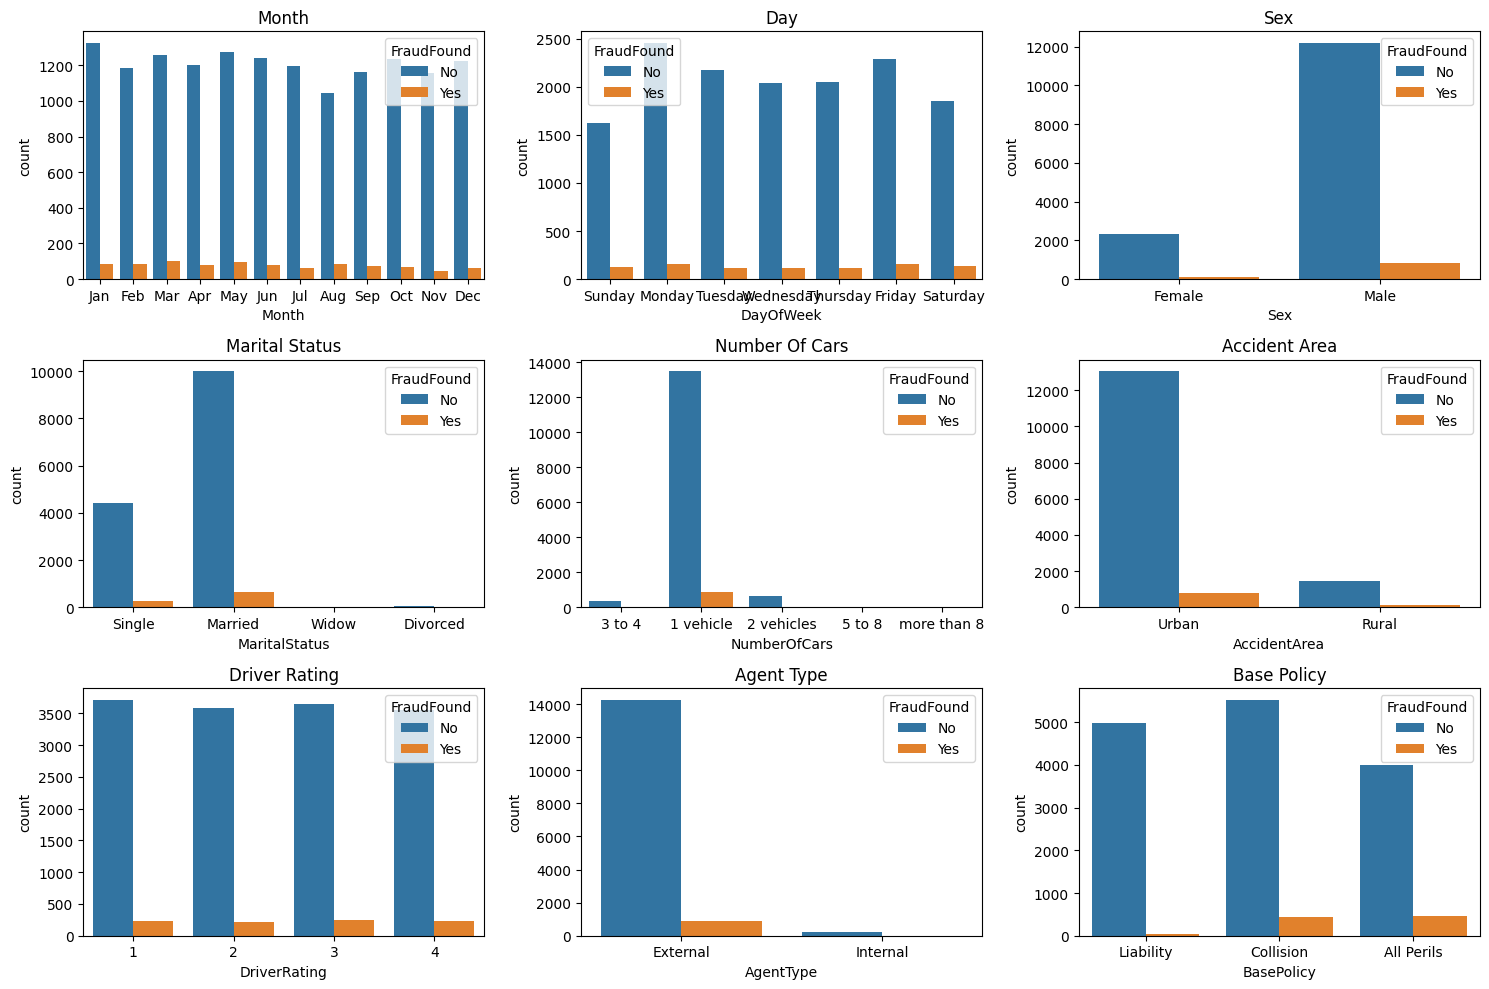

In [10]:
fig, ax = plt.subplots(3,3, figsize=(15,10))
sns.countplot(data=df, x='Month', hue='FraudFound', order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ax=ax[0][0])
ax[0][0].set_title('Month')

sns.countplot(data=df, x='DayOfWeek', hue='FraudFound', order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], ax=ax[0][1])
ax[0][1].set_title('Day')

sns.countplot(data=df, x='Sex', hue='FraudFound', ax=ax[0][2])
ax[0][2].set_title('Sex')

sns.countplot(data=df, x='MaritalStatus', hue='FraudFound', ax=ax[1][0])
ax[1][0].set_title('Marital Status')

sns.countplot(data=df, x='NumberOfCars', hue='FraudFound', ax=ax[1][1])
ax[1][1].set_title('Number Of Cars')

sns.countplot(data=df, x='AccidentArea', hue='FraudFound', ax=ax[1][2])
ax[1][2].set_title('Accident Area')

sns.countplot(data=df, x='DriverRating', hue='FraudFound', ax=ax[2][0])
ax[2][0].set_title('Driver Rating')

sns.countplot(data=df, x='AgentType', hue='FraudFound', ax=ax[2][1])
ax[2][1].set_title('Agent Type')

sns.countplot(data=df, x='BasePolicy', hue='FraudFound', ax=ax[2][2])
ax[2][2].set_title('Base Policy')


plt.tight_layout()

##### Converting Yes and No values of "FraudFound" to 1 and 0 respectively

In [11]:
df["FraudFound"] = df["FraudFound"].replace('No', 0)
df["FraudFound"] = df["FraudFound"].replace('Yes', 1)


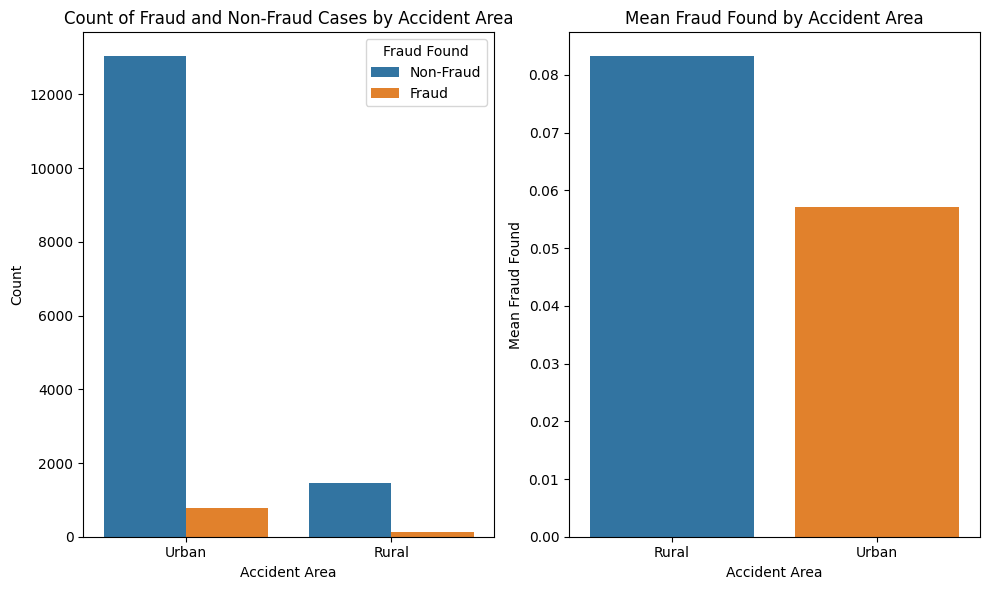

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))


sns.countplot(x='AccidentArea', hue='FraudFound', data=df, ax=ax[0])
ax[0].set_title('Count of Fraud and Non-Fraud Cases by Accident Area')
ax[0].set_xlabel('Accident Area')
ax[0].set_ylabel('Count')
ax[0].legend(title='Fraud Found', labels=['Non-Fraud', 'Fraud'])


area_fraud = df.groupby('AccidentArea')['FraudFound'].mean()
sns.barplot(x=area_fraud.index, y=area_fraud.values, ax=ax[1])
ax[1].set_title('Mean Fraud Found by Accident Area')
ax[1].set_xlabel('Accident Area')
ax[1].set_ylabel('Mean Fraud Found')



plt.tight_layout()



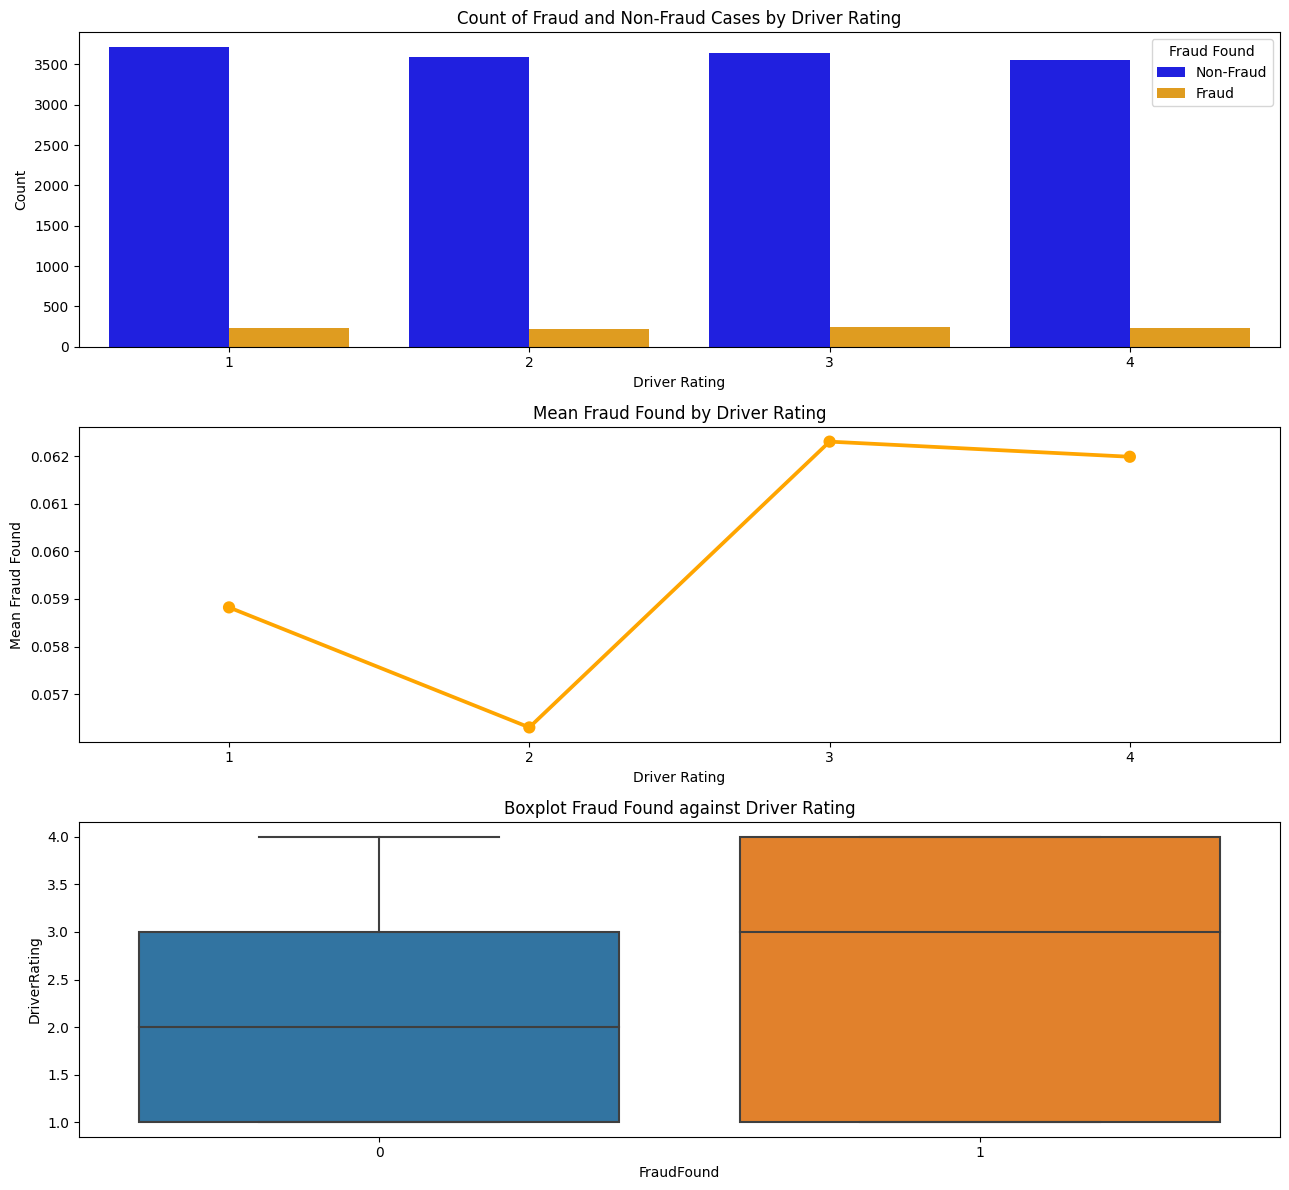

In [13]:
fig, ax = plt.subplots(3, 1, figsize=(13, 12))

sns.countplot(x='DriverRating', hue='FraudFound', data=df, ax=ax[0], palette=["blue","orange"])
ax[0].set_title('Count of Fraud and Non-Fraud Cases by Driver Rating')
ax[0].set_xlabel('Driver Rating')
ax[0].set_ylabel('Count')
ax[0].legend(title='Fraud Found', labels=['Non-Fraud', 'Fraud'])

rating_fraud = df.groupby('DriverRating')['FraudFound'].mean()
sns.pointplot(x=rating_fraud.index, y=rating_fraud.values, ax=ax[1],color="orange")
ax[1].set_title('Mean Fraud Found by Driver Rating')
ax[1].set_xlabel('Driver Rating')
ax[1].set_ylabel('Mean Fraud Found')

sns.boxplot( y=df["DriverRating"], x=df["FraudFound"])
ax[2].set_title('Boxplot Fraud Found against Driver Rating')

plt.tight_layout()

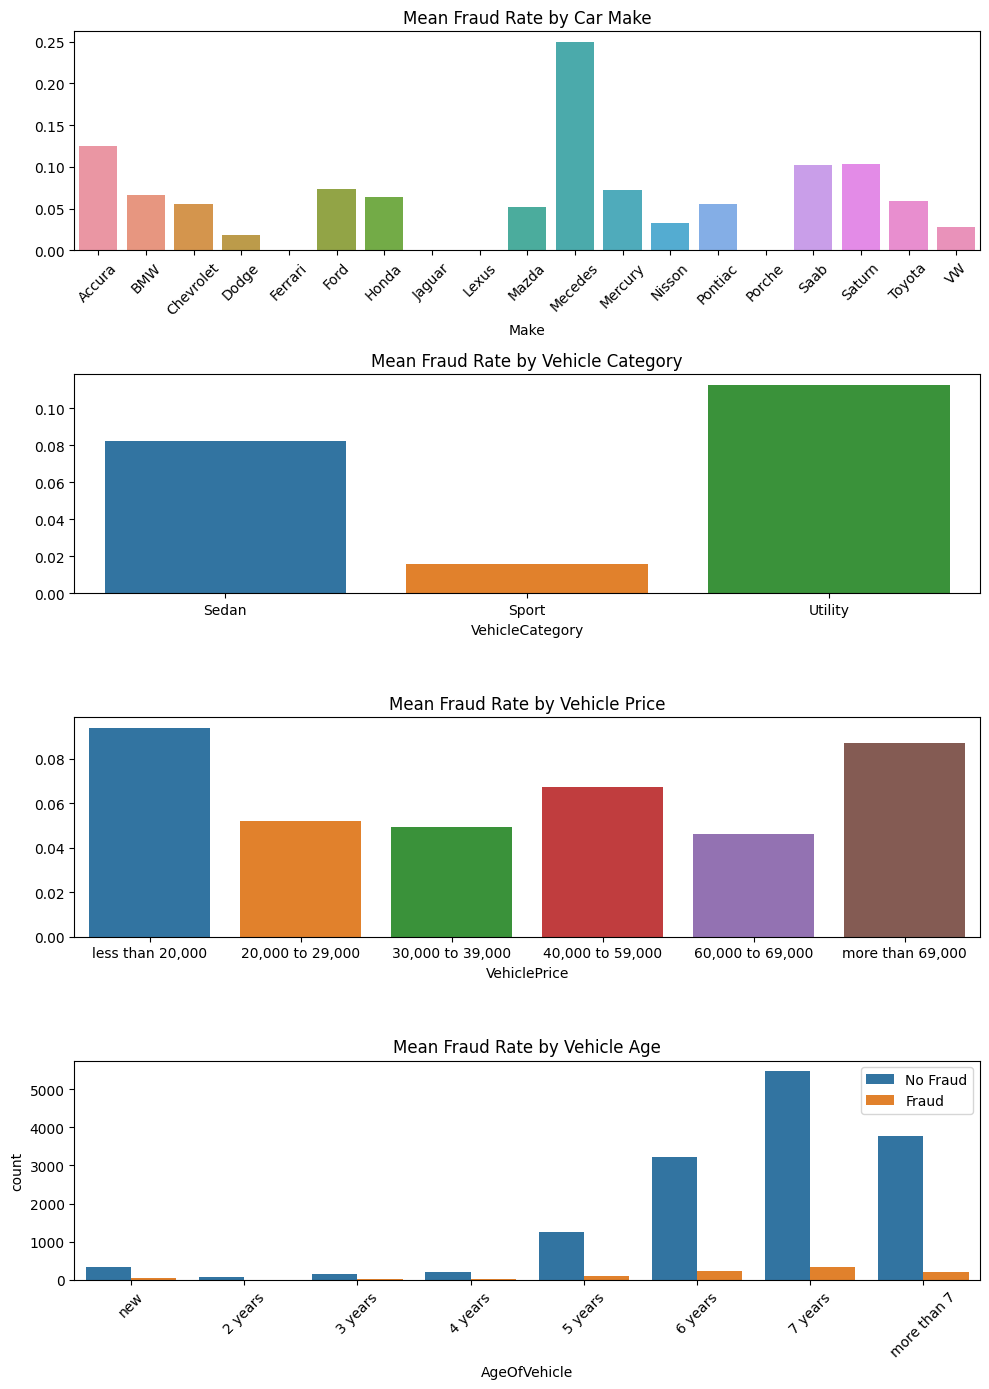

In [14]:
make_fraud = df.groupby('Make')['FraudFound'].mean()
category_fraud = df.groupby('VehicleCategory')['FraudFound'].mean()
price_fraud = df.groupby('VehiclePrice')['FraudFound'].mean()
vehAge_fraud = df.groupby('AgeOfVehicle')['FraudFound'].mean()

fig, ax = plt.subplots(4, 1, figsize=(10,14))
age_order = [ 'new','2 years','3 years', '4 years','5 years' ,'6 years', '7 years', 'more than 7',]
price_order =['less than 20,000', '20,000 to 29,000', '30,000 to 39,000',  '40,000 to 59,000', '60,000 to 69,000','more than 69,000']
sns.barplot(x=make_fraud.index, y=make_fraud.values, ax=ax[0])
sns.barplot(x=category_fraud.index, y=category_fraud.values, ax=ax[1])
sns.barplot(x=price_fraud.index, y=price_fraud.values, ax=ax[2], order = price_order)
sns.countplot(x = 'AgeOfVehicle', hue = "FraudFound", data = df, order=age_order)

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=45)


ax[0].set_title('Mean Fraud Rate by Car Make')
ax[1].set_title('Mean Fraud Rate by Vehicle Category')
ax[2].set_title('Mean Fraud Rate by Vehicle Price')
ax[3].set_title('Mean Fraud Rate by Vehicle Age')
ax[3].legend(['No Fraud','Fraud'], loc ='upper right')

plt.tight_layout()

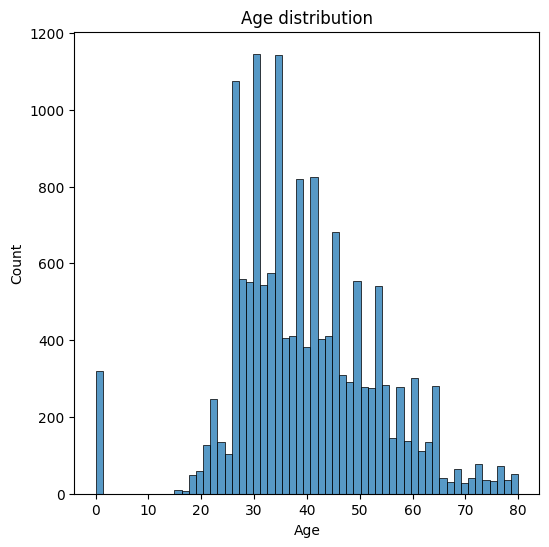

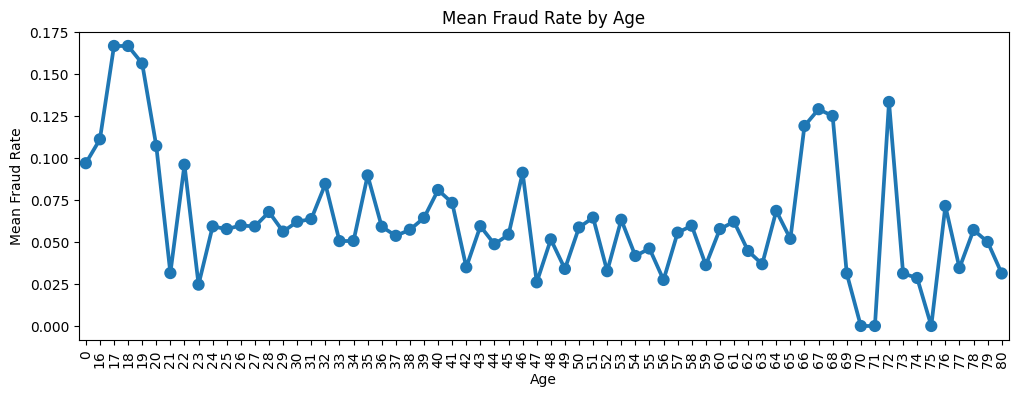

In [15]:
plt.figure(figsize=(6,6))
sns.histplot(df['Age'])
plt.title('Age distribution')
plt.show()

age_fraud = df.groupby('Age')['FraudFound'].mean().reset_index()
plt.figure(figsize=(12, 4))
sns.pointplot(data=age_fraud, x='Age', y='FraudFound')
plt.title('Mean Fraud Rate by Age')

plt.xlabel('Age')
plt.ylabel('Mean Fraud Rate')
plt.xticks(rotation=90)  

plt.show()

### Potential Outliers

Rows with Age == 0 seem to fall under 16 to 17 age range under AgeOfPolicyHolder feature

In [16]:
df.loc[df.Age == 0, "AgeOfPolicyHolder"].value_counts()

16 to 17    320
Name: AgeOfPolicyHolder, dtype: int64

Not Possible for month to be 0, we will deal with this outlier in preprocessing

In [17]:
df[df.MonthClaimed == '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,"more than 69,000",1517,15,400,2,more than 30,none,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils,0


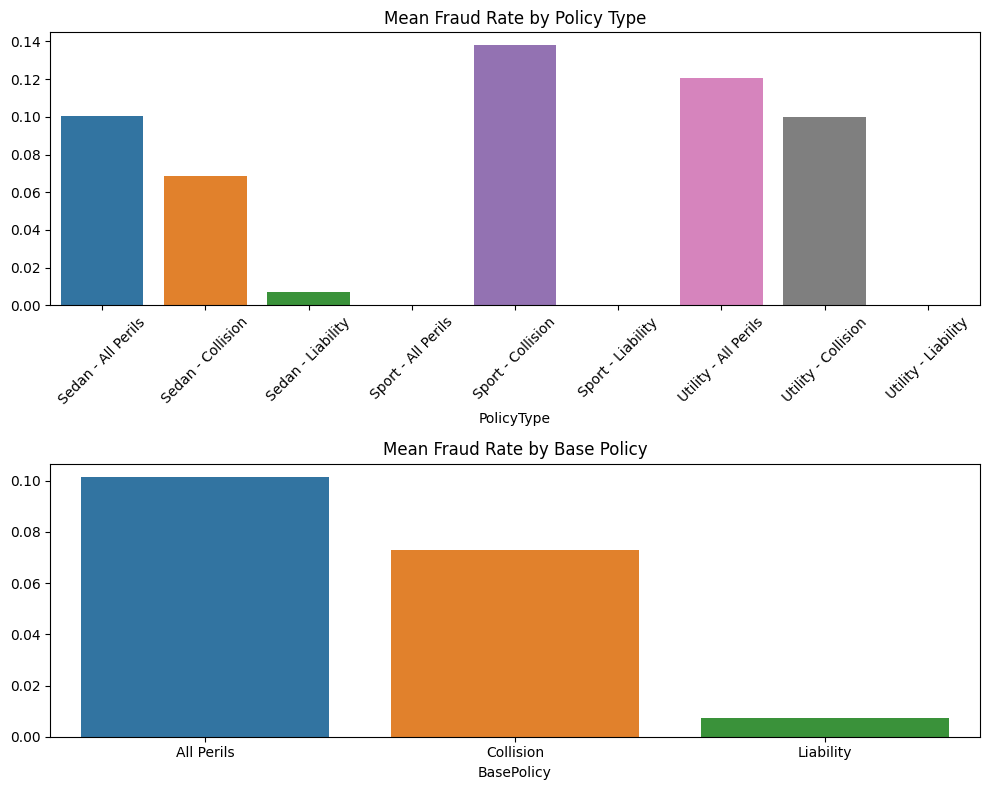

In [18]:
policyType_fraud = df.groupby('PolicyType')['FraudFound'].mean()
basePolicy_fraud = df.groupby('BasePolicy')['FraudFound'].mean()

fig, ax = plt.subplots(2, 1, figsize=(10,8))

sns.barplot(x=policyType_fraud.index, y=policyType_fraud.values, ax=ax[0])
sns.barplot(x=basePolicy_fraud.index, y=basePolicy_fraud.values, ax=ax[1])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

ax[0].set_title('Mean Fraud Rate by Policy Type')
ax[1].set_title('Mean Fraud Rate by Base Policy')

plt.tight_layout()

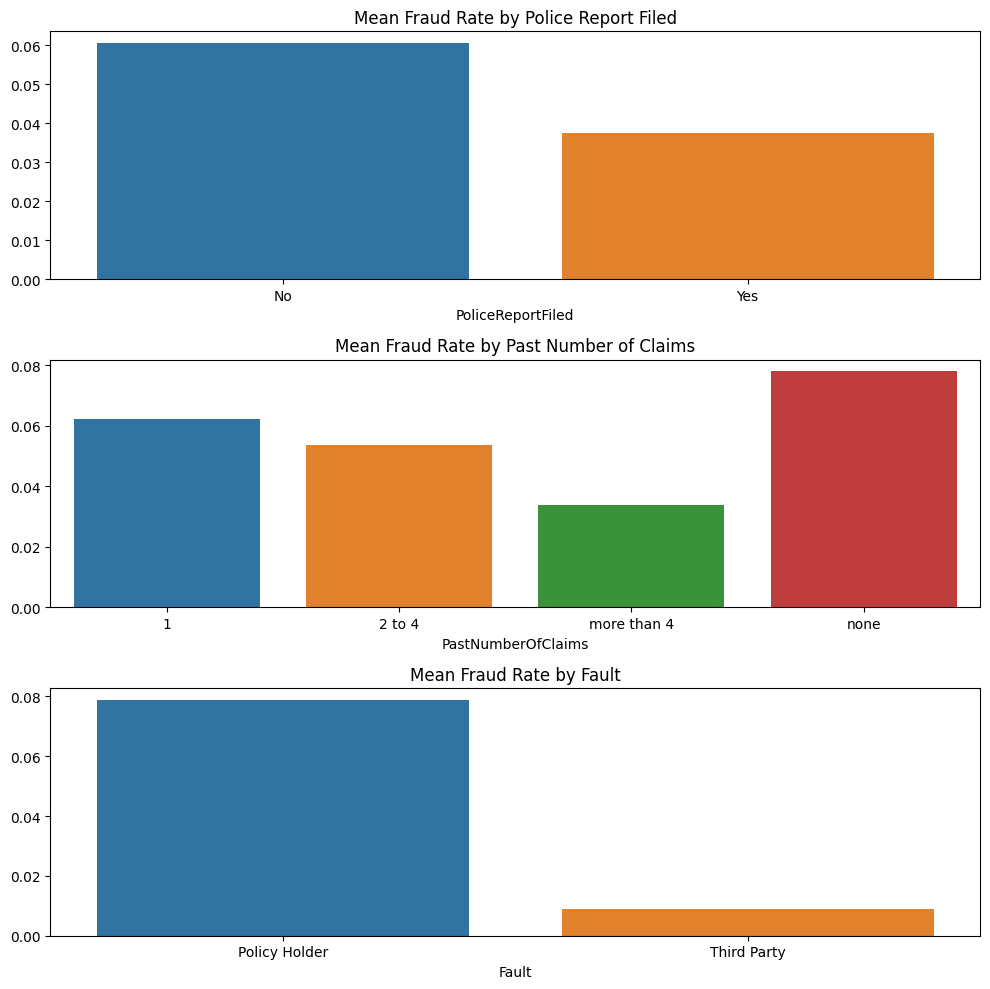

In [19]:
police_fraud = df.groupby('PoliceReportFiled')['FraudFound'].mean()
pastClaims_fraud = df.groupby('PastNumberOfClaims')['FraudFound'].mean()
fault_fraud = df.groupby('Fault')['FraudFound'].mean()

fig, ax = plt.subplots(3, 1, figsize=(10,10))

sns.barplot(x=police_fraud.index, y=police_fraud.values, ax=ax[0])
sns.barplot(x=pastClaims_fraud.index, y=pastClaims_fraud.values, ax=ax[1])
sns.barplot(x=fault_fraud.index, y=fault_fraud.values, ax=ax[2])

ax[0].set_title('Mean Fraud Rate by Police Report Filed')
ax[1].set_title('Mean Fraud Rate by Past Number of Claims')
ax[2].set_title('Mean Fraud Rate by Fault')

plt.tight_layout()

### Correlation Matrix between FraudFound and Categorical Variables (String Datatype)

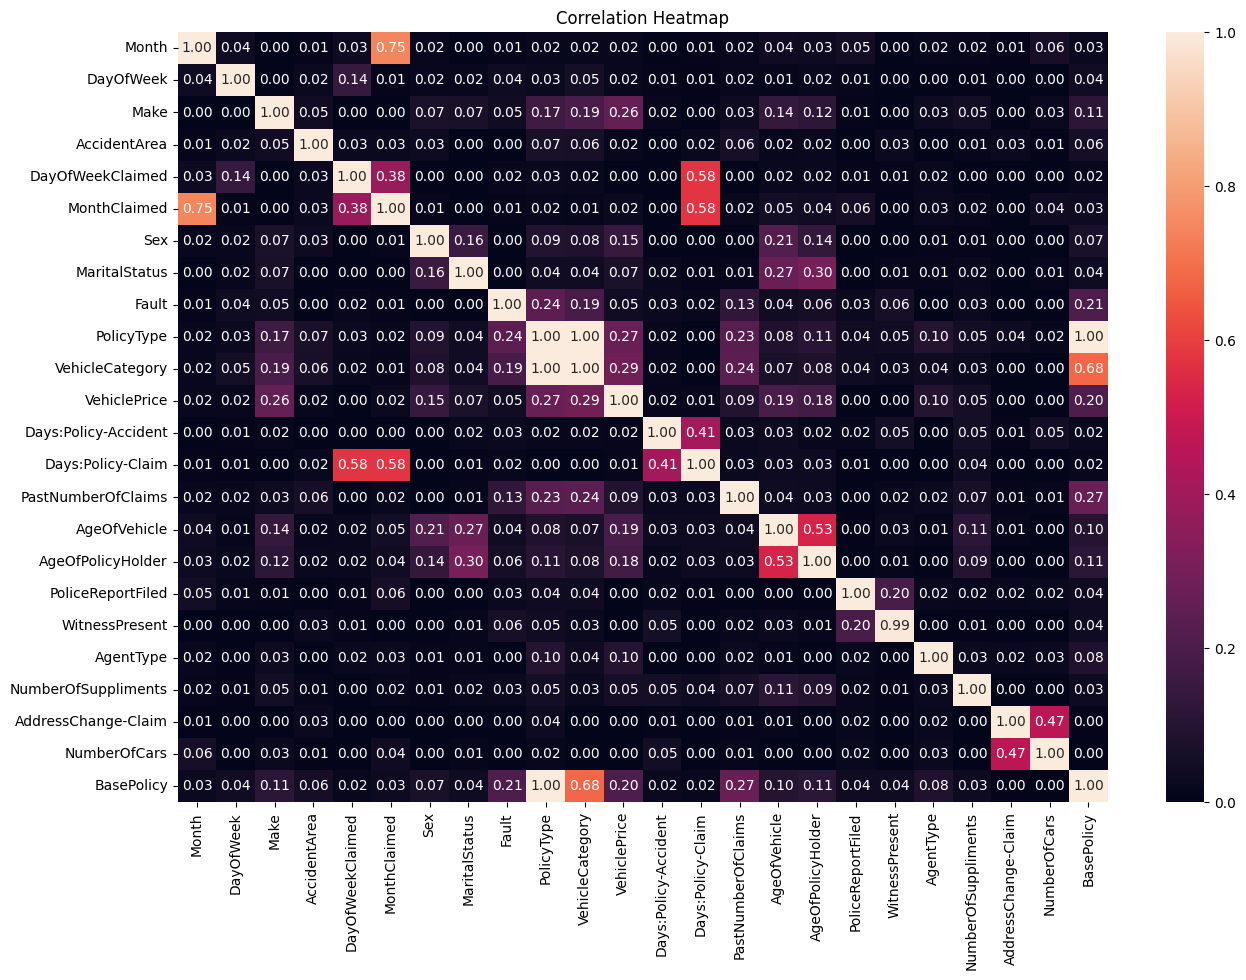

In [20]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

df1 = df.select_dtypes(include="object")
corr_matrix = pd.DataFrame(index=df1.columns, columns=df1.columns)

for i in df1.columns:
    for j in df1.columns:
        corr_matrix.loc[i, j] = cramers_v(df1[i], df1[j])

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix.astype(float), annot=True,fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


### Correlation Matrix between FraudFound and Categorical Variables (Numerical Datatype)

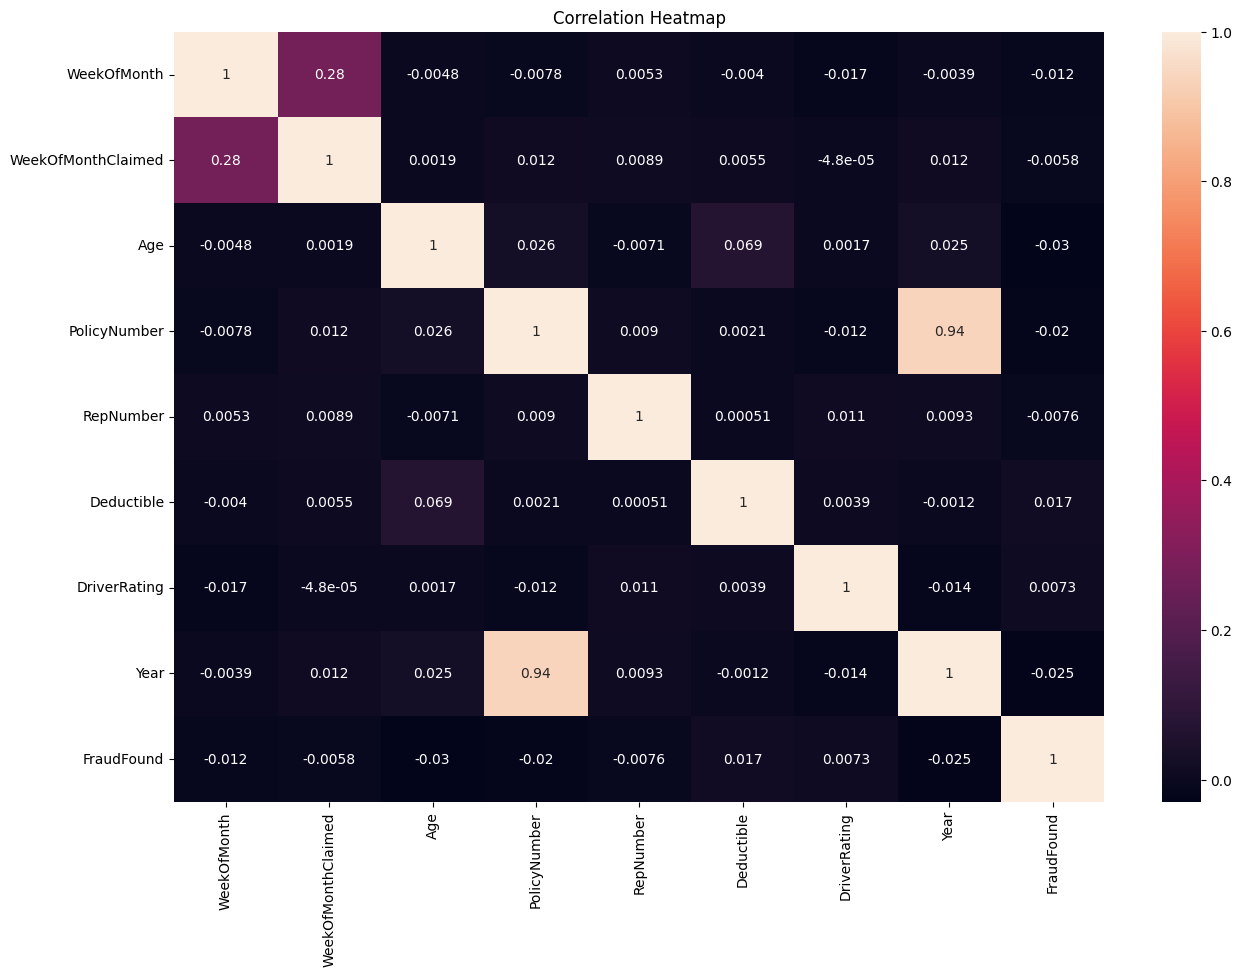

In [21]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

## Data Preprocessing and Data Splitting

In [22]:
import pandas as pd
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def get_processed_data():
    ## Global data preprocessing
    df = pd.read_csv("carclaims.csv")
    df = df.drop(columns=['PolicyNumber',"PolicyType", "RepNumber"])
    df['Age'] =df['Age'].replace({0:16.5})
    df = df[df["MonthClaimed"]!='0']
    
    ## Feature Creation
    # Weekend Feature
    df["Weekend"] = df["DayOfWeek"].apply(lambda x: 1 if x in ["Saturday", "Sunday"] else 0)
    
    # Accident Prone age groups based on https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/810853
    df["AccidentProneAge"] = df["Age"].apply(lambda x: 1 if (16 <= int(x) <= 25 | int(x) > 65) else 0)
    
    
    ## Encoding ordinal features
    col_ordering = [{'col':'Month','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
        {'col':'DayOfWeek','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
        {'col':'DayOfWeekClaimed','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
        {'col':'MonthClaimed','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
        {'col':'PastNumberOfClaims','mapping':{'none':0 ,'1':1,'2 to 4':2,'more than 4':5 }},
        {'col':'NumberOfSuppliments','mapping':{'none':0,'1 to 2':1,'3 to 5':3,'more than 5':6}}, 
        {'col':'VehiclePrice','mapping':{'less than 20,000':1,'20,000 to 29,000':2,'30,000 to 39,000':3,
                                        '40,000 to 59,000':4,'60,000 to 69,000':5, 'more than 69,000':6}},
        {'col':'AgeOfVehicle','mapping':{'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new':0,'4 years':4,'2 years':2}},
        {'col':'Days:Policy-Accident','mapping':{'more than 30':4,'15 to 30':3,'none':0,'1 to 7':1,'8 to 15':2}},
        {'col':'Days:Policy-Claim','mapping':{'more than 30':4,'15 to 30':3,'none':0,'1 to 7':1,'8 to 15':2}},
        {'col':'AgeOfPolicyHolder','mapping':{'16 to 17':1,'18 to 20':2,'21 to 25':3,'26 to 30':4,'31 to 35':5,'36 to 40':6,
                                            '41 to 50':7,'51 to 65':8,'over 65':9}},
        {'col':'AddressChange-Claim','mapping':{'no change':0,'under 6 months':1,'1 year':2,'2 to 3 years':3,'4 to 8 years':4}},
        {'col':'NumberOfCars','mapping':{'1 vehicle':1,'2 vehicles':2,'3 to 4':3,'5 to 8':4,'more than 8':5}}]



    ord_encoder = OrdinalEncoder(mapping = col_ordering, return_df=True)
    df2 = df.copy()
    df2 = ord_encoder.fit_transform(df2)

    ## Encoding nominal features
    onehot = OneHotEncoder(cols=["Make",'MaritalStatus', 'VehicleCategory', 'BasePolicy'], use_cat_names=True, return_df=True) 
    df3 = onehot.fit_transform(df2)

    df4 = df3.copy()
    df4[['PoliceReportFiled', 'WitnessPresent']] = df3[['PoliceReportFiled', 'WitnessPresent']].replace({'No': 0, 'Yes': 1})
    df4[['AccidentArea']] = df4[['AccidentArea']].replace( {
        'Rural' : 0,
        'Urban' : 1
        })
    df4[['Fault']] = df4[['Fault']].replace( {
        'Third Party' : 0,
        'Policy Holder' : 1
        })
    df4[['Sex']] = df4[['Sex']].replace( {
        'Female' : 0,
        'Male' : 1
        })
    df4[['AgentType']] = df4[['AgentType']].replace({
        'Internal' : 0,
        'External' : 1
        })
    df4[['FraudFound']] = df4[['FraudFound']].replace({
        'No' : 0,
        'Yes' : 1
        })

    # df_binary_encoded = pd.get_dummies(df4['Make'], prefix='Make')
    # df4 = pd.concat([df4, df_binary_encoded], axis=1)
    # df4 = df4.drop('Make', axis=1)
    
    df4.to_csv('processed_data.csv', index=False)

    X = df4.drop('FraudFound', axis=1)  # Features
    y = df4['FraudFound']  # Target variable

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    print("Training set shape:", X_train.shape, y_train.shape)
    print("Validation set shape:", X_val.shape, y_val.shape)
    print("Test set shape:", X_test.shape, y_test.shape)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    return df4, X_train, y_train, X_val, y_val, X_test, y_test

#### Sampling Methods

In [23]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule

def undersample(X_train, y_train):
    undersampled_data = RandomUnderSampler(sampling_strategy='majority', random_state=42)
    X_under, y_under = undersampled_data.fit_resample(X_train, y_train)
    return X_under, y_under

def oversample(X_train, y_train):
    oversampled_data = RandomOverSampler(sampling_strategy='minority', random_state=42)
    X_over, y_over = oversampled_data.fit_resample(X_train, y_train)
    return X_over, y_over

def smote(X_train, y_train):
    smote_data = SMOTE(random_state=42)
    X_smote, y_smote = smote_data.fit_resample(X_train, y_train)
    return X_smote, y_smote

def ncr(X_train, y_train):
    undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
    y_copy = y_train.copy()
    y_copy = y_copy.replace("Yes", 1)
    y_copy = y_copy.replace("No", 0)
    X_ncr, y_ncr = undersample.fit_resample(X_train, y_copy)
    # y_ncr = y_ncr.replace("Yes", 1)
    # y_ncr = y_ncr.replace("No", 0)
    # y_ncr = y_ncr.replace(1, "Yes")
    # y_ncr = y_ncr.replace(0, "No")
    return X_ncr, y_ncr

#### Feature Selection Methods

In [24]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

def forward_select(model, X_train, y_train):
    model.fit(X_train, y_train)
    ffs = SequentialFeatureSelector(model, k_features='best', forward=True, n_jobs=-1)
    ffs.fit(X_train, y_train) 
    features = list(ffs.k_feature_names_)
    print(f"Features selected: {features}")
    return features

def backward_select(model, X_train, y_train):
    model.fit(X_train, y_train)
    bfs = SequentialFeatureSelector(model, k_features='best', forward=False, n_jobs=-1)
    bfs.fit(X_train, y_train) 
    features = list(bfs.k_feature_names_)
    print(f"Features selected: {features}")
    return features

def rf_select(X_train, y_train):
    sel = SelectFromModel(RandomForestClassifier(), threshold= "0.5*mean")
    sel.fit(X_train, y_train)
    selected_feat= X_train.columns[(sel.get_support())]
    print(len(selected_feat))
    print(selected_feat)
    return selected_feat

#### Chosen Metrics and Metric Function

In [25]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def show_metrics(actual, predicted, pos_label = 'Yes', neg_label = 'No'):
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()
    accuracy = metrics.accuracy_score(actual, predicted)
    precision = metrics.precision_score(actual, predicted, pos_label = pos_label)
    recall = metrics.recall_score(actual, predicted, pos_label = pos_label)
    specificity = metrics.recall_score(actual, predicted, pos_label= neg_label)
    f1_score = metrics.f1_score(actual, predicted, pos_label = pos_label)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Specificity: {specificity}")
    print(f"F1_score: {f1_score}")

    # Generate ROC curve and calculate AUC
    y_pred_classes = [1 if i>0.5 else 0 for i in predicted]
    fpr, tpr, thresholds = roc_curve(actual, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


def get_metrics(actual, predicted, pos_label = 'Yes', neg_label = 'No'):

    accuracy = metrics.accuracy_score(actual, predicted)
    precision = metrics.precision_score(actual, predicted, pos_label = pos_label)
    recall = metrics.recall_score(actual, predicted, pos_label = pos_label)
    specificity = metrics.recall_score(actual, predicted, pos_label= neg_label)
    f1_score = metrics.f1_score(actual, predicted, pos_label = pos_label)

    return accuracy, precision, recall, specificity, f1_score

### Can ignore but don't remove
def show_metrics_DL(actual, predicted, samp, pos_label = 1, neg_label = 0):
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()
    accuracy = metrics.accuracy_score(actual, predicted)
    precision = metrics.precision_score(actual, predicted, pos_label = pos_label)
    recall = metrics.recall_score(actual, predicted, pos_label = pos_label)
    specificity = metrics.recall_score(actual, predicted, pos_label= neg_label)
    f1_score = metrics.f1_score(actual, predicted, pos_label = pos_label)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Specificity: {specificity}")
    print(f"F1_score: {f1_score}")

    # Generate ROC curve and calculate AUC
    y_pred_classes = [1 if i>0.5 else 0 for i in predicted]
    fpr, tpr, thresholds = roc_curve(actual, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({samp})')
    plt.legend(loc='lower right')
    plt.show()

## Models

# Logistic Regression

In [26]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from scipy.stats import randint
from get_processed_data import get_processed_data
from show_metrics import show_metrics
from sampling import oversample, undersample, smote, ncr
from feature_selection import rf_select

pd.options.display.max_rows = 60
pd.options.display.max_columns = 60

df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()

Training set shape: (12335, 57) (12335,)
Validation set shape: (1542, 57) (1542,)
Test set shape: (1542, 57) (1542,)


## Base model

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


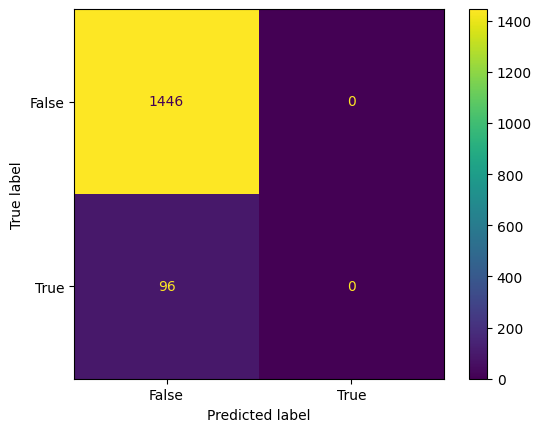

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9377431906614786
Precision: 0.0
Recall: 0.0
Specificity: 1.0
F1_score: 0.0


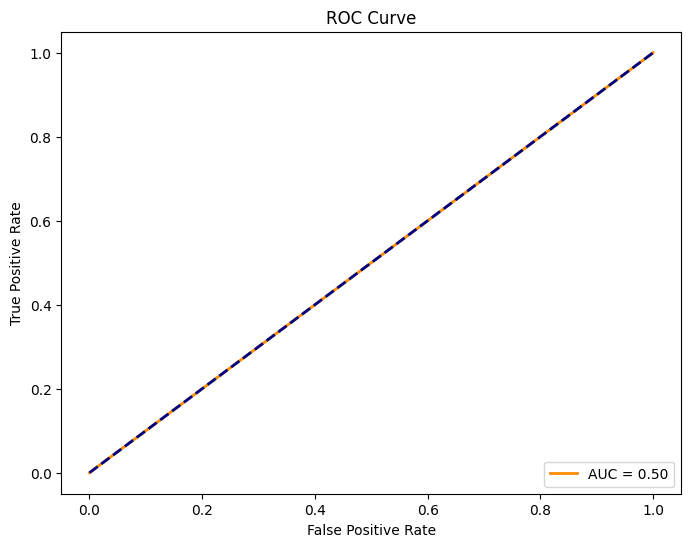

In [27]:
logr = linear_model.LogisticRegression()
logr.fit(X_train, y_train)
predicted = logr.predict(X_val)
show_metrics(y_val, predicted, 1, 0)

## Undersample

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


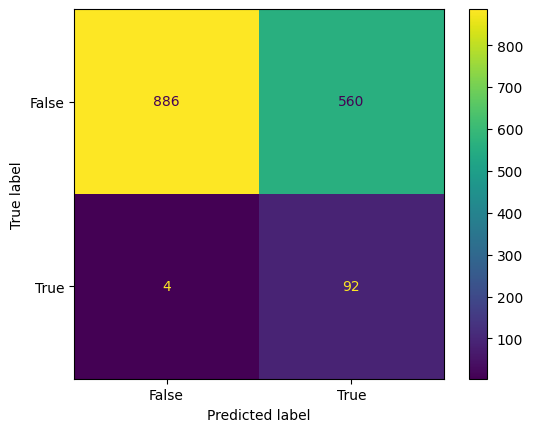

Accuracy: 0.6342412451361867
Precision: 0.1411042944785276
Recall: 0.9583333333333334
Specificity: 0.6127247579529738
F1_score: 0.24598930481283424


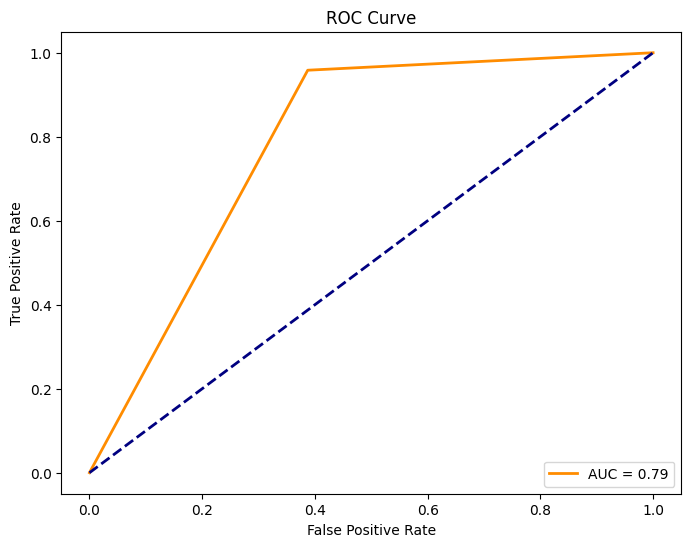

In [28]:
X_under, y_under = undersample(X_train, y_train)
logr = linear_model.LogisticRegression()
logr.fit(X_under, y_under)
predicted = logr.predict(X_val)
show_metrics(y_val, predicted, 1, 0)

## Oversample

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


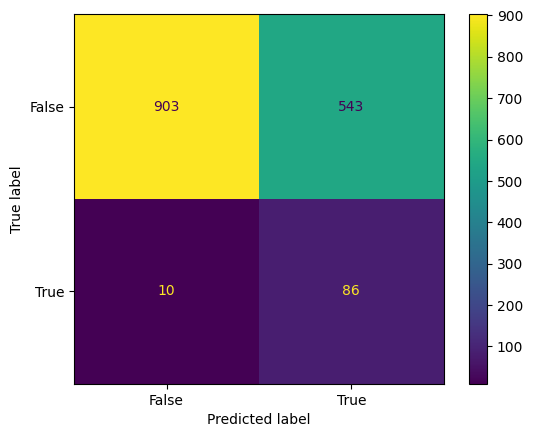

Accuracy: 0.6413748378728924
Precision: 0.13672496025437203
Recall: 0.8958333333333334
Specificity: 0.6244813278008299
F1_score: 0.23724137931034484


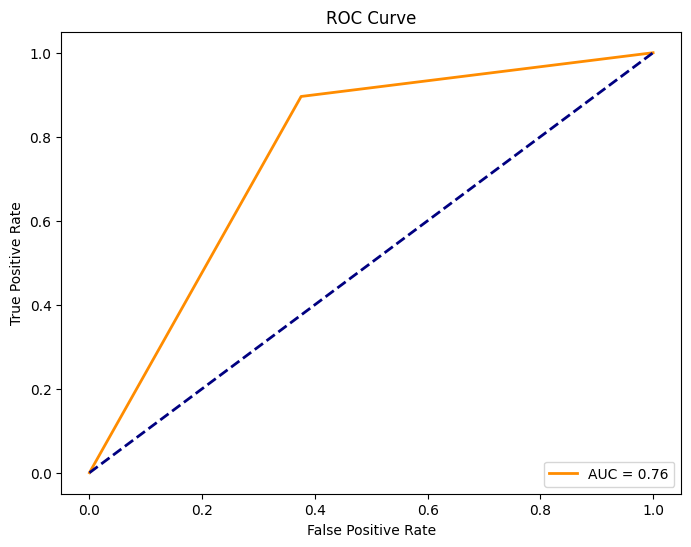

In [29]:
X_over, y_over = oversample(X_train, y_train)
logr = linear_model.LogisticRegression()
logr.fit(X_over, y_over)
predicted = logr.predict(X_val)
show_metrics(y_val, predicted, 1, 0)

## SMOTE

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


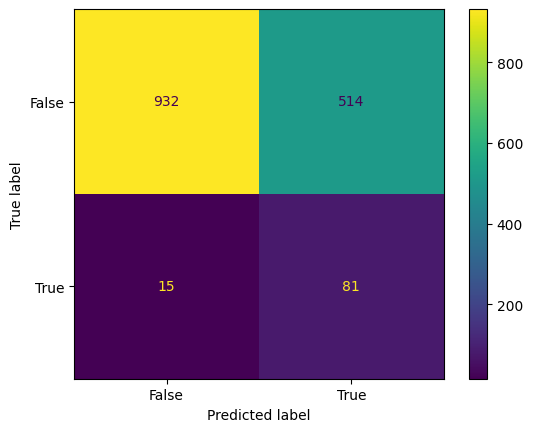

Accuracy: 0.6569390402075227
Precision: 0.1361344537815126
Recall: 0.84375
Specificity: 0.6445366528354081
F1_score: 0.23444283646888567


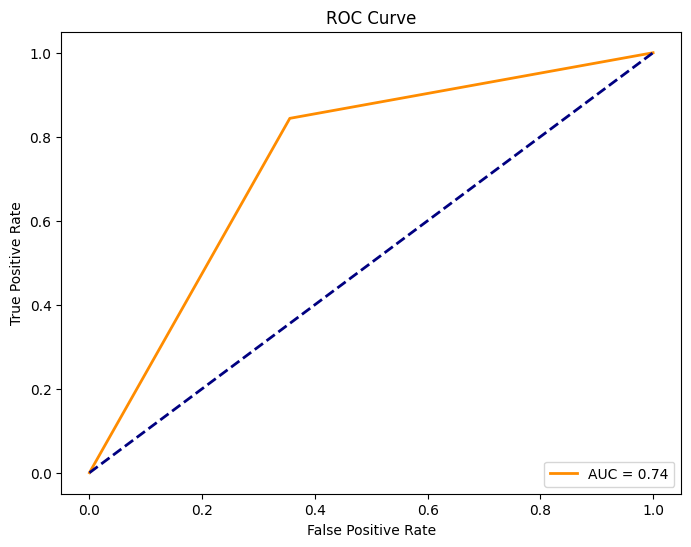

In [30]:
X_smote, y_smote = smote(X_train, y_train)
logr = linear_model.LogisticRegression()
logr.fit(X_smote, y_smote)
predicted = logr.predict(X_val)
show_metrics(y_val, predicted, 1, 0)

## Neighbourhood Cleaning Rule

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


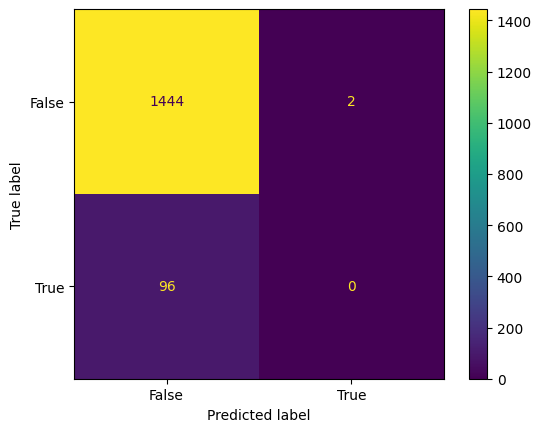

Accuracy: 0.9364461738002594
Precision: 0.0
Recall: 0.0
Specificity: 0.9986168741355463
F1_score: 0.0


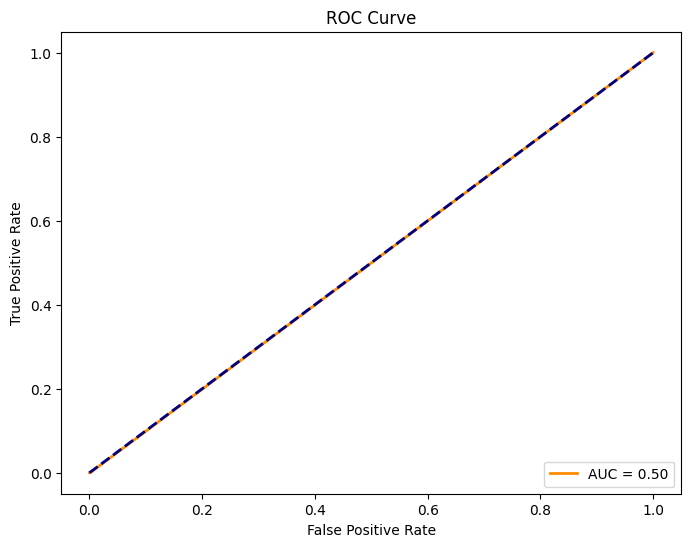

In [31]:
X_ncr, y_ncr = ncr(X_train, y_train)
logr = linear_model.LogisticRegression()
logr.fit(X_ncr, y_ncr)
predicted = logr.predict(X_val)
show_metrics(y_val, predicted, 1, 0)

## Oversampling with feature selection

31 features selected: Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make_Honda', 'Make_Toyota',
       'Make_Mazda', 'Make_Chevrolet', 'Make_Pontiac', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus_Single', 'MaritalStatus_Married', 'Age', 'Fault',
       'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy_Liability', 'BasePolicy_All Perils', 'Weekend'],
      dtype='object')


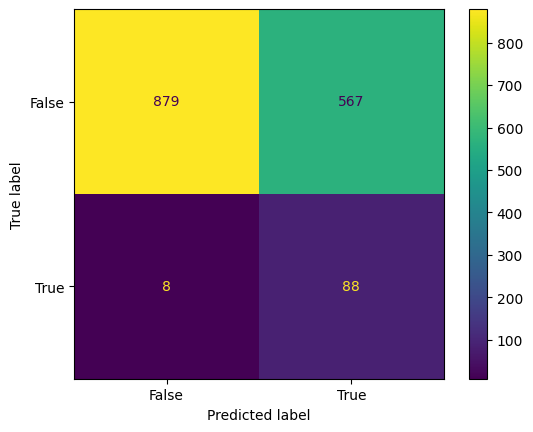

Accuracy: 0.6271076523994812
Precision: 0.13435114503816795
Recall: 0.9166666666666666
Specificity: 0.6078838174273858
F1_score: 0.23435419440745675


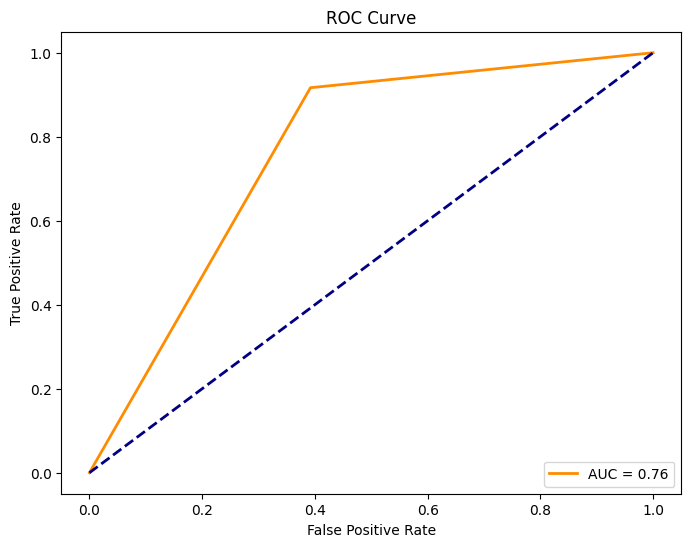

In [32]:
features = rf_select(X_train, y_train)
X_over, y_over = oversample(X_train, y_train)
X_over = X_over[features]
X_val_over = X_val[features]
logr = linear_model.LogisticRegression()
logr.fit(X_over, y_over)
predicted = logr.predict(X_val_over)
show_metrics(y_val, predicted, 1, 0)

## Checking best model against test data

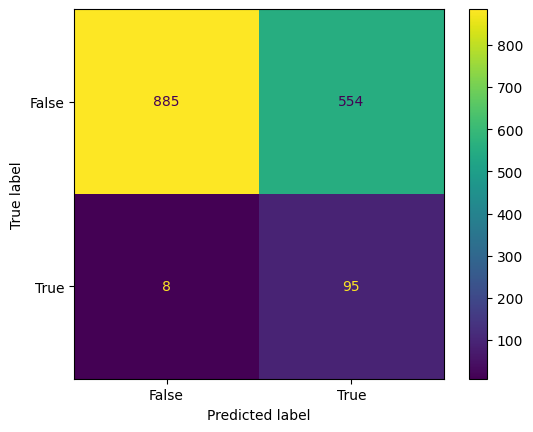

Accuracy: 0.6355382619974059
Precision: 0.14637904468412943
Recall: 0.9223300970873787
Specificity: 0.6150104239054899
F1_score: 0.2526595744680851


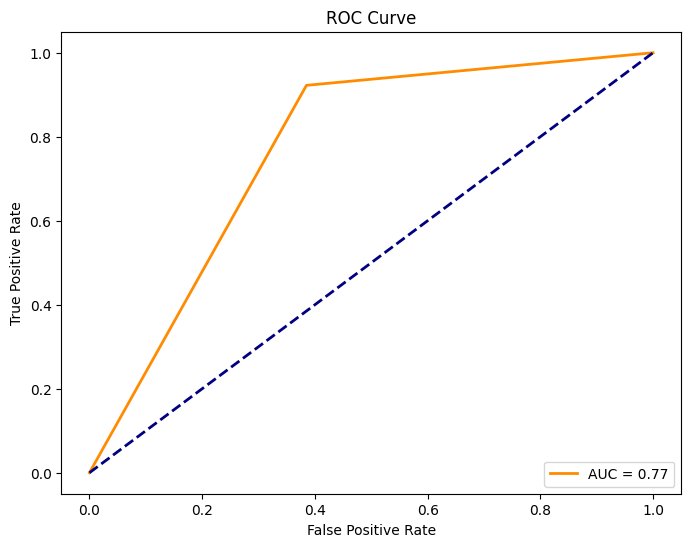

In [33]:
X_test = X_test[features]
predicted = logr.predict(X_test)
show_metrics(y_test, predicted, 1, 0)

# Random Forest

In [35]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from scipy.stats import randint
from get_processed_data import get_processed_data
from show_metrics import show_metrics
from sampling import oversample, undersample, smote, ncr
import numpy as np
from collections import Counter
from feature_selection import rf_select


pd.options.display.max_rows = 60
pd.options.display.max_columns = 60

df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()

Training set shape: (12335, 57) (12335,)
Validation set shape: (1542, 57) (1542,)
Test set shape: (1542, 57) (1542,)


## Base model

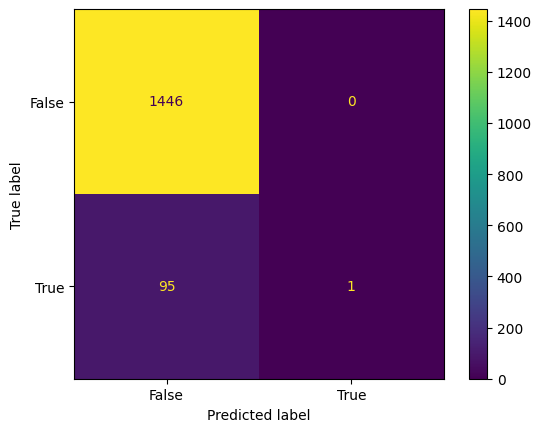

Accuracy: 0.9383916990920882
Precision: 1.0
Recall: 0.010416666666666666
Specificity: 1.0
F1_score: 0.020618556701030924


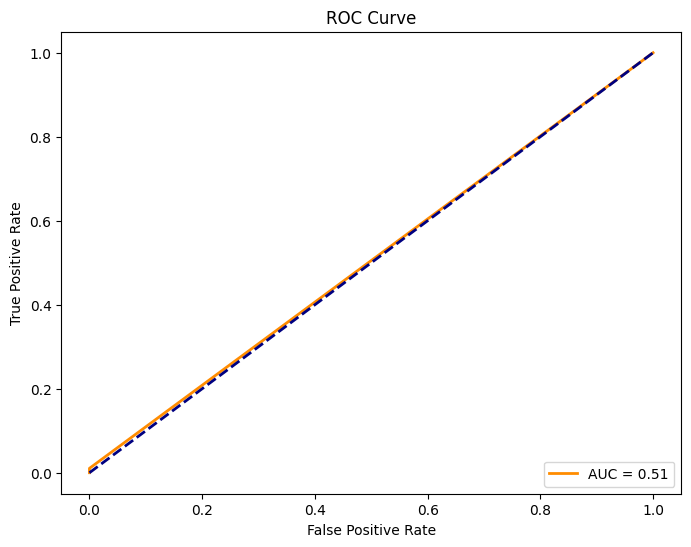

In [36]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
show_metrics(y_val, y_pred, 1, 0)

## Undersample

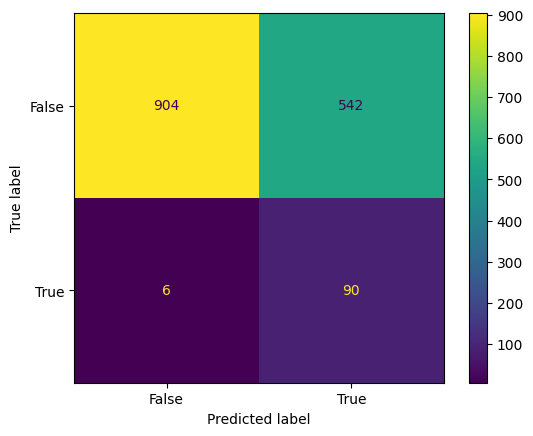

Accuracy: 0.6446173800259404
Precision: 0.14240506329113925
Recall: 0.9375
Specificity: 0.6251728907330567
F1_score: 0.24725274725274726


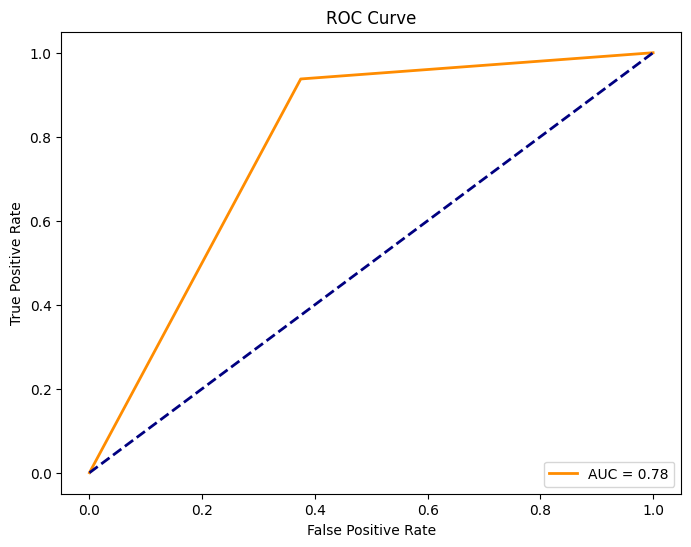

In [37]:
X_under, y_under = undersample(X_train, y_train)
rf = RandomForestClassifier()
rf.fit(X_under, y_under)
y_pred = rf.predict(X_val)
show_metrics(y_val, y_pred, 1, 0)

## Oversample

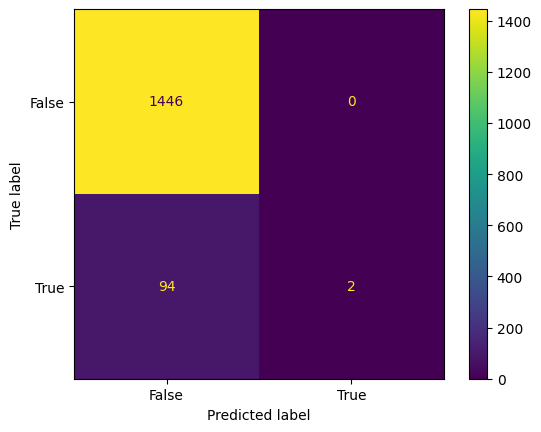

Accuracy: 0.9390402075226978
Precision: 1.0
Recall: 0.020833333333333332
Specificity: 1.0
F1_score: 0.04081632653061225


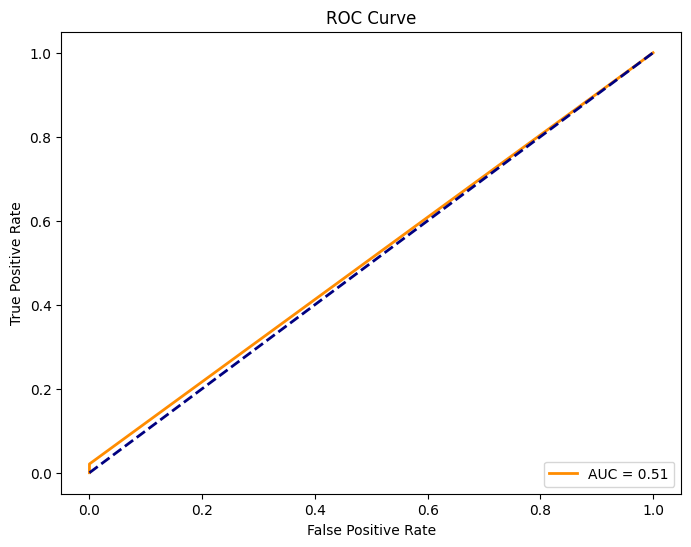

In [38]:
X_over, y_over = oversample(X_train, y_train)
rf = RandomForestClassifier()
rf.fit(X_over, y_over)
y_pred = rf.predict(X_val)
show_metrics(y_val, y_pred, 1, 0)

## SMOTE

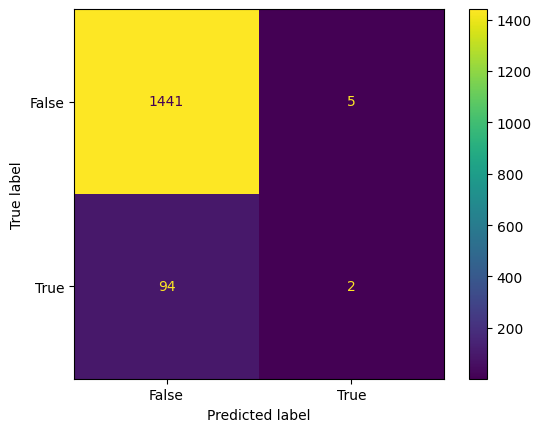

Accuracy: 0.9357976653696498
Precision: 0.2857142857142857
Recall: 0.020833333333333332
Specificity: 0.9965421853388658
F1_score: 0.03883495145631068


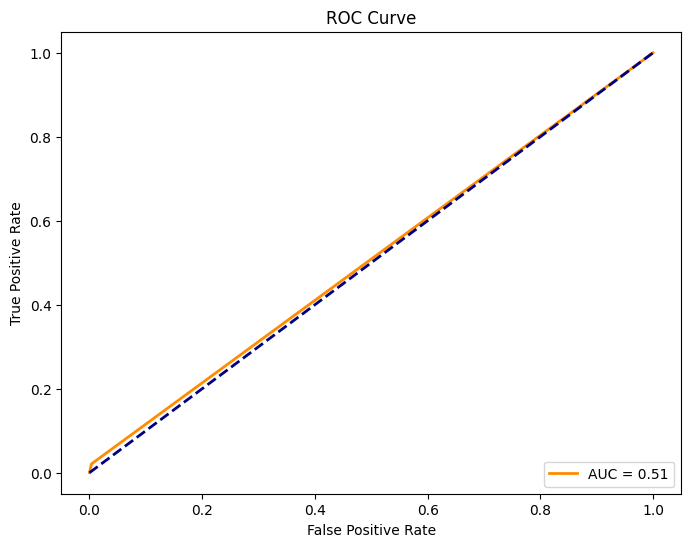

In [39]:
X_smote, y_smote = smote(X_train, y_train)
rf = RandomForestClassifier()
rf.fit(X_smote, y_smote)
y_pred = rf.predict(X_val)
show_metrics(y_val, y_pred, 1, 0)

## Neighbourhood Cleaning Rule

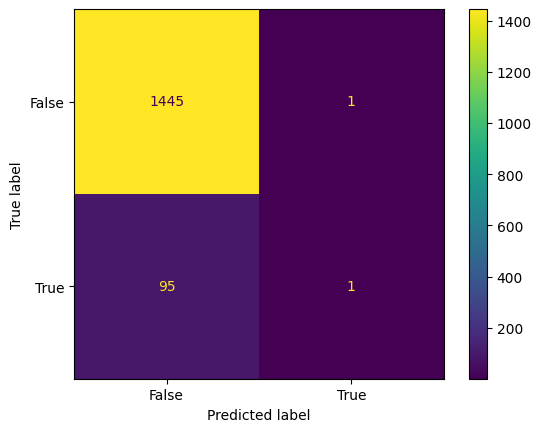

Accuracy: 0.9377431906614786
Precision: 0.5
Recall: 0.010416666666666666
Specificity: 0.9993084370677732
F1_score: 0.020408163265306124


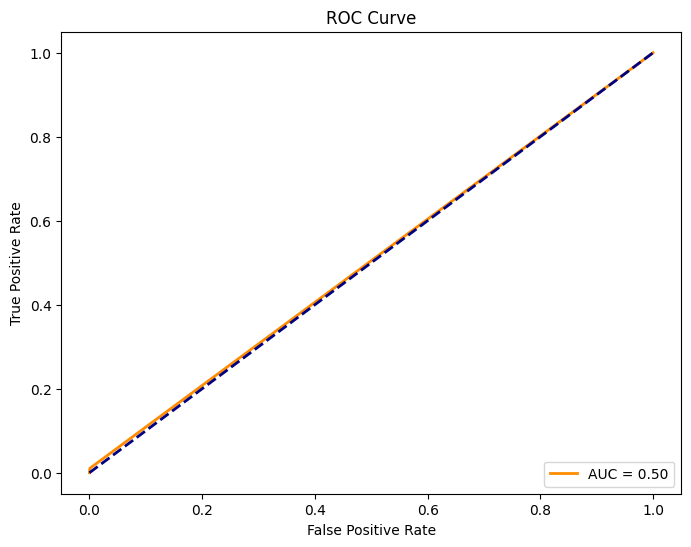

In [40]:
X_ncr, y_ncr = ncr(X_train, y_train)
rf = RandomForestClassifier()
rf.fit(X_ncr, y_ncr)
y_pred = rf.predict(X_val)
show_metrics(y_val, y_pred, 1, 0)

## Feature Selection

In [41]:
features = rf_select(X_train, y_train)

33 features selected: Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make_Honda', 'Make_Toyota',
       'Make_Mazda', 'Make_Chevrolet', 'Make_Pontiac', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus_Single', 'MaritalStatus_Married', 'Age', 'Fault',
       'VehicleCategory_Sedan', 'VehiclePrice', 'RepNumber', 'Deductible',
       'DriverRating', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'NumberOfSuppliments', 'AddressChange-Claim',
       'NumberOfCars', 'Year', 'BasePolicy_Liability', 'BasePolicy_Collision',
       'BasePolicy_All Perils', 'Weekend'],
      dtype='object')


## Undersampling with feature selection

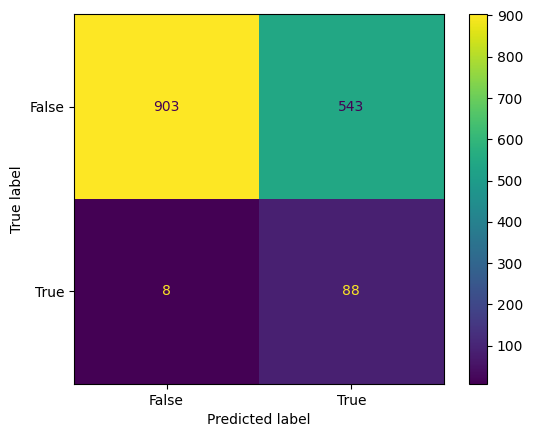

Accuracy: 0.6426718547341116
Precision: 0.13946117274167988
Recall: 0.9166666666666666
Specificity: 0.6244813278008299
F1_score: 0.24209078404401654


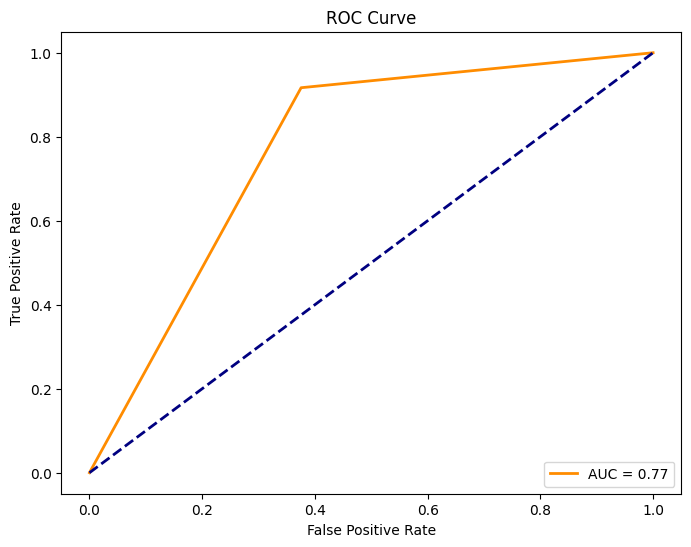

In [42]:
X_under, y_under = undersample(X_train, y_train)
X_under = X_under[features]
X_val_under = X_val[features]
rf = RandomForestClassifier()
rf.fit(X_under, y_under)
y_pred = rf.predict(X_val_under)
show_metrics(y_val, y_pred, 1, 0)

## SMOTE with feature selection

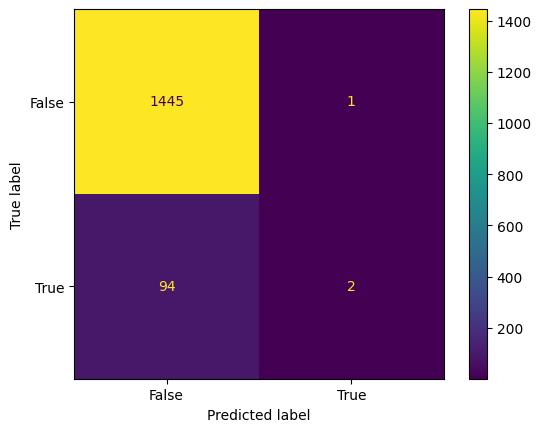

Accuracy: 0.9383916990920882
Precision: 0.6666666666666666
Recall: 0.020833333333333332
Specificity: 0.9993084370677732
F1_score: 0.0404040404040404


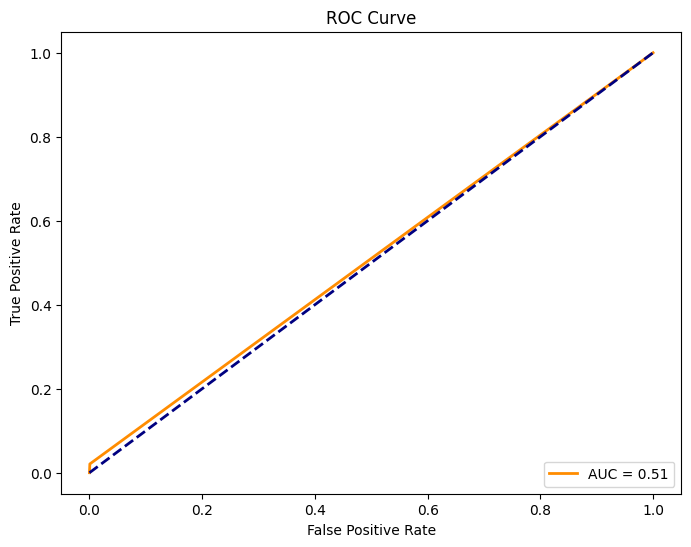

In [43]:
X_smote, y_smote = smote(X_train, y_train)
X_smote = X_smote[features]
X_val_smote = X_val[features]
rf = RandomForestClassifier()
rf.fit(X_smote, y_smote)
y_pred = rf.predict(X_val_smote)
show_metrics(y_val, y_pred, 1, 0)

## Undersampling with feature selection and hyperparameter tuning

Best hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1000}


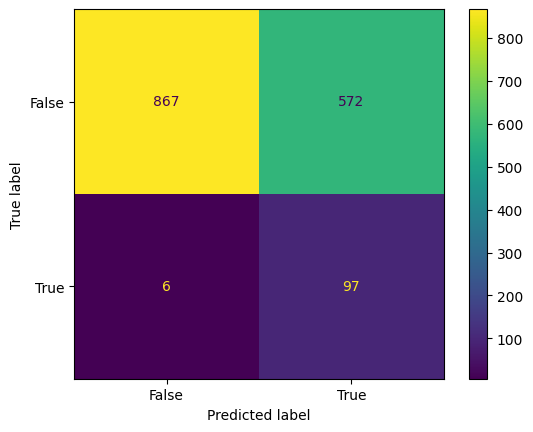

Accuracy: 0.6251621271076524
Precision: 0.14499252615844543
Recall: 0.941747572815534
Specificity: 0.6025017373175816
F1_score: 0.2512953367875647


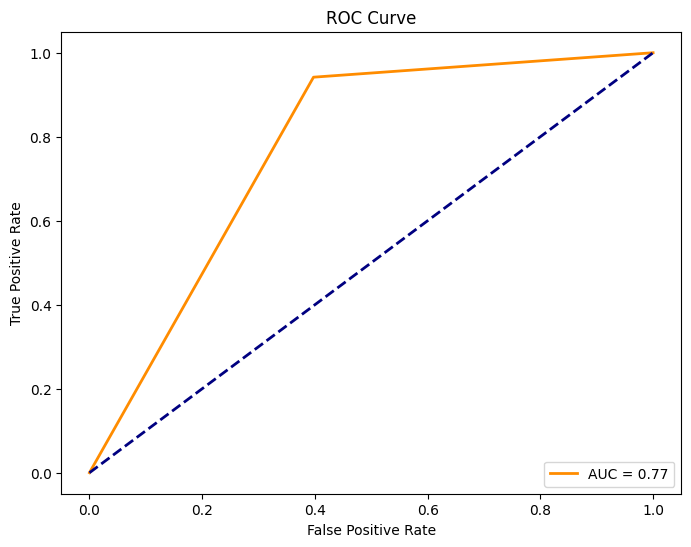

In [44]:
X_under, y_under = undersample(X_train, y_train)
X_under = X_under[features]
X_val_under = X_val[features]
X_test_under = X_test[features]

grid = {'bootstrap': [True],
    'max_depth': [10, 50, 100],
    'max_features': ['log2', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 300, 1000]}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid = grid, cv=5, scoring='recall')

grid_search.fit(X_under, y_under)
best_rf = grid_search.best_estimator_
print('Best hyperparameters:',  grid_search.best_params_)

y_pred = best_rf.predict(X_test_under)
show_metrics(y_test, y_pred, 1, 0)

# K Nearest Neighbours

In [46]:
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV

from get_processed_data import get_processed_data
from show_metrics import show_metrics
from sampling import oversample, undersample, smote, ncr
from feature_selection import rf_select

### Splitting data

In [47]:
df, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()

Training set shape: (12335, 57) (12335,)
Validation set shape: (1542, 57) (1542,)
Test set shape: (1542, 57) (1542,)


## Without Sampling 

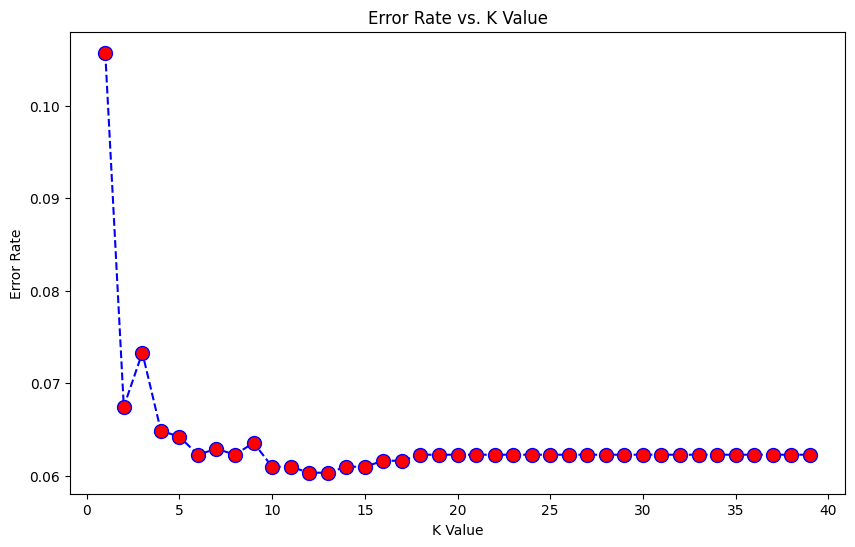

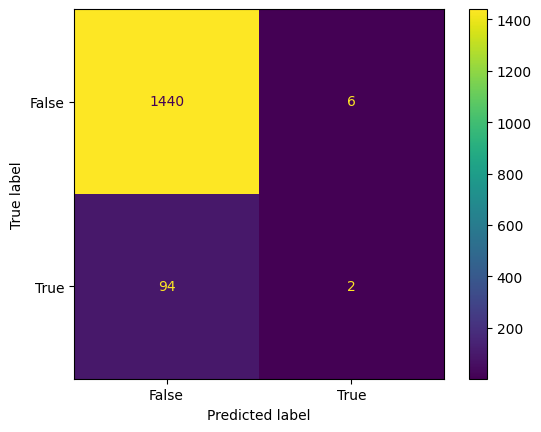

Accuracy: 0.9351491569390402
Precision: 0.25
Recall: 0.020833333333333332
Specificity: 0.995850622406639
F1_score: 0.038461538461538464


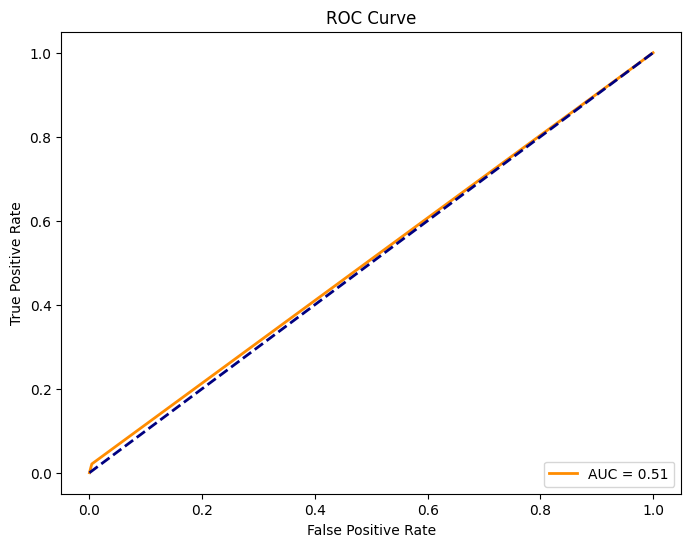

In [48]:
error_rate = []

for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_val)
 error_rate.append(np.mean(pred_i != y_val))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_val)

show_metrics(y_val,y_pred, 1, 0)

## Undersample

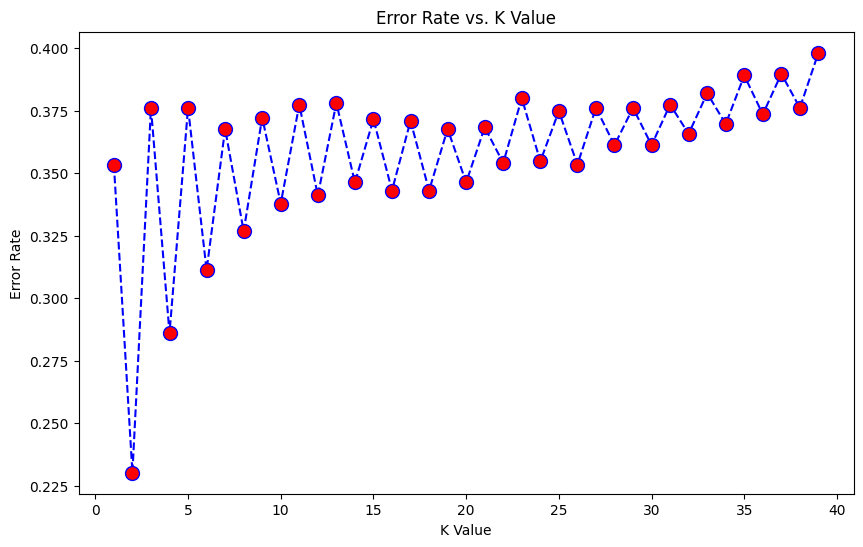

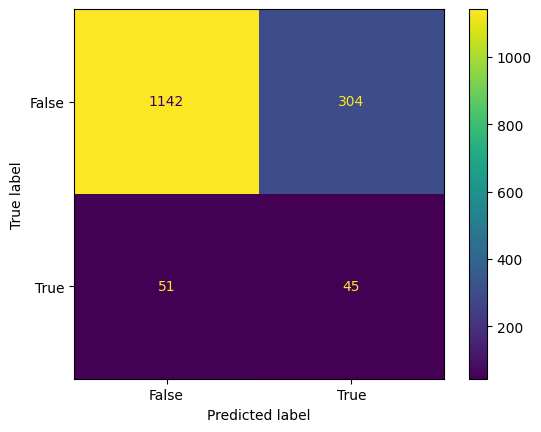

Accuracy: 0.7697795071335928
Precision: 0.12893982808022922
Recall: 0.46875
Specificity: 0.7897648686030428
F1_score: 0.20224719101123595


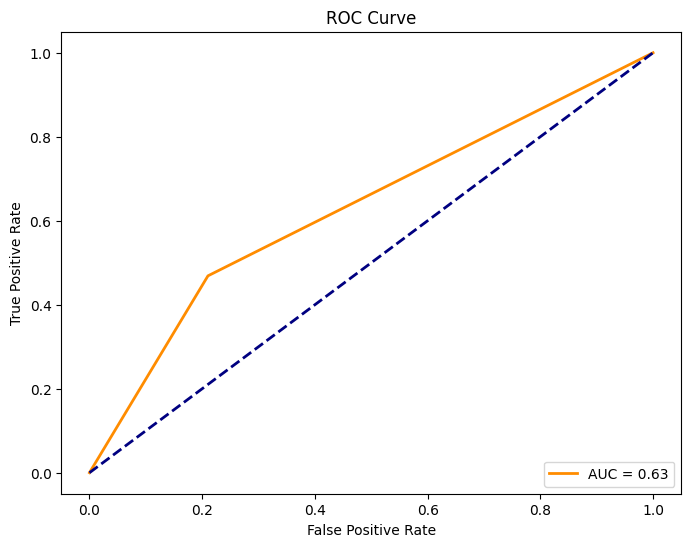

In [49]:
X_under, y_under = undersample(X_train, y_train)

error_rate = []

for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_under,y_under)
 pred_i = knn.predict(X_val)
 error_rate.append(np.mean(pred_i != y_val))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")


knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_under,y_under)
y_pred = knn.predict(X_val)

show_metrics(y_val,y_pred, 1, 0)

## Oversample 

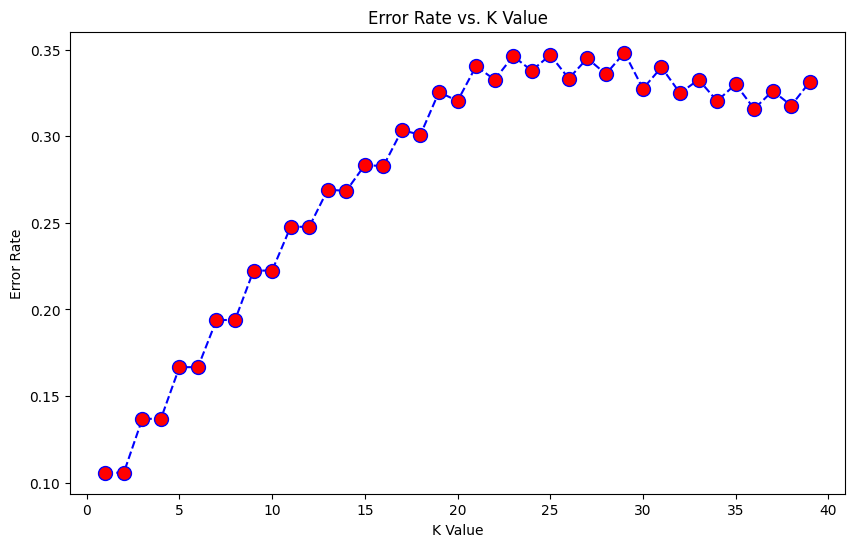

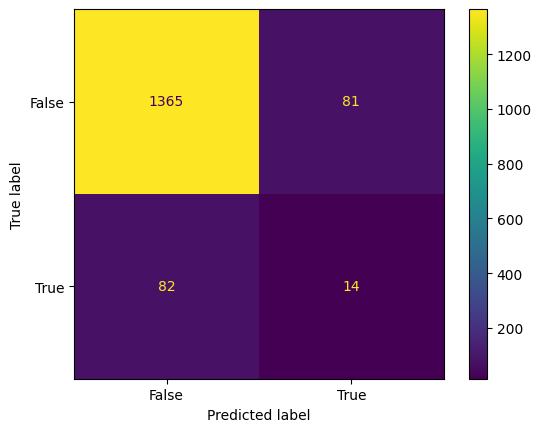

Accuracy: 0.8942931258106356
Precision: 0.14736842105263157
Recall: 0.14583333333333334
Specificity: 0.9439834024896265
F1_score: 0.14659685863874347


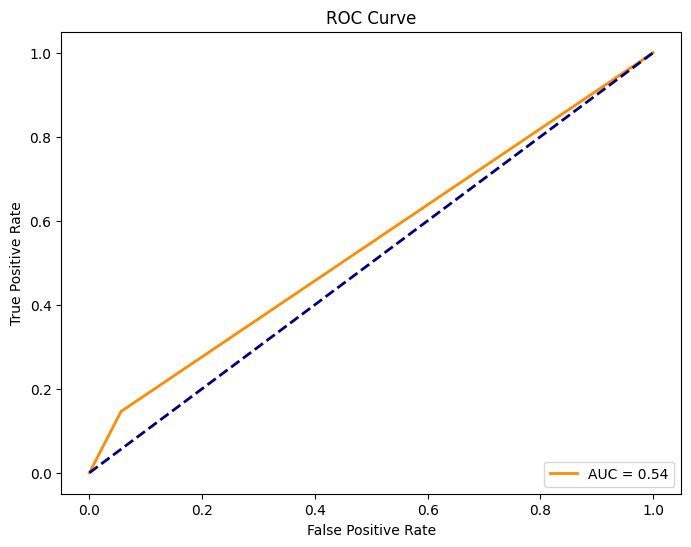

In [50]:
X_over, y_over = oversample(X_train, y_train)

error_rate = []

for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_over,y_over)
 pred_i = knn.predict(X_val)
 error_rate.append(np.mean(pred_i != y_val))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")


knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_over,y_over)
y_pred = knn.predict(X_val)

show_metrics(y_val,y_pred, 1, 0)

## SMOTE 

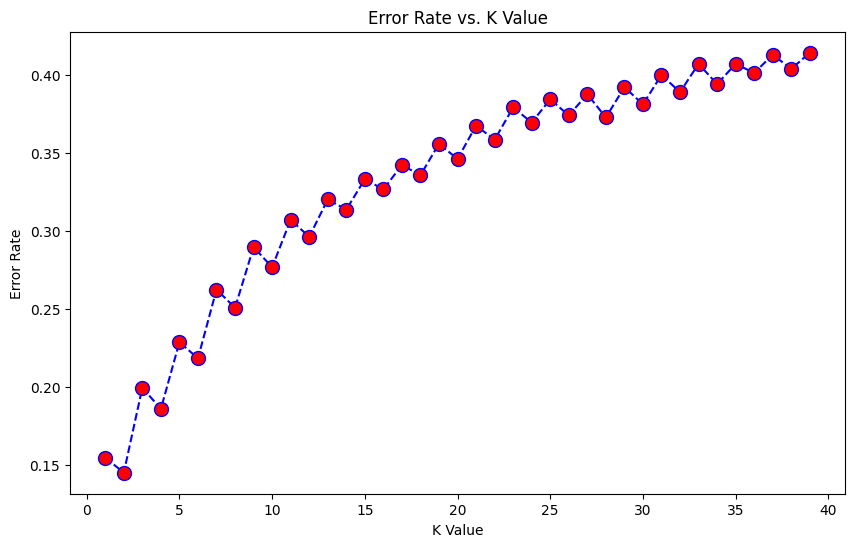

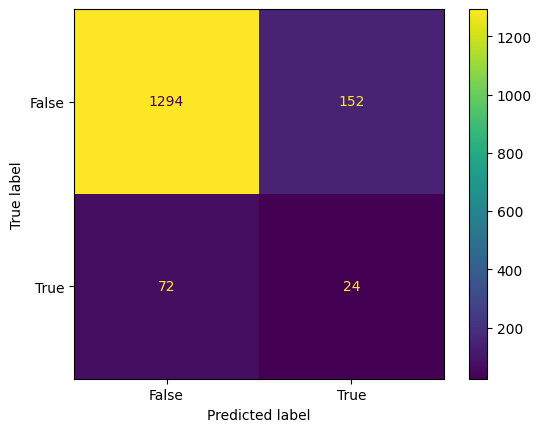

Accuracy: 0.85473411154345
Precision: 0.13636363636363635
Recall: 0.25
Specificity: 0.8948824343015215
F1_score: 0.1764705882352941


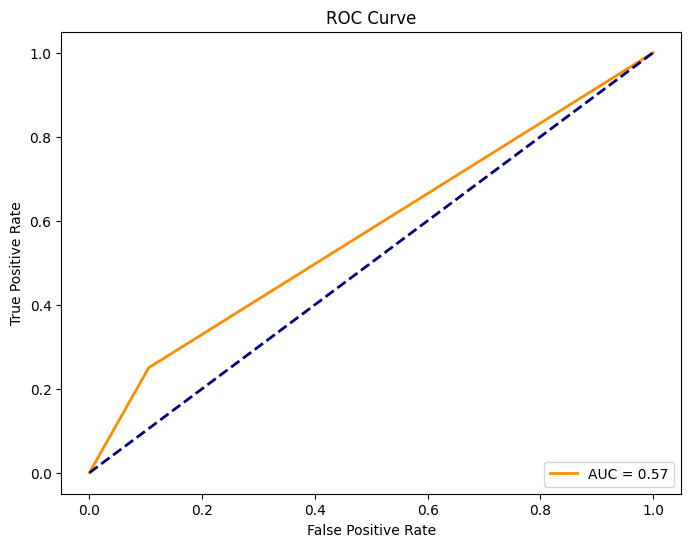

In [51]:
X_smote, y_smote = smote(X_train, y_train)

error_rate = []

for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_smote,y_smote)
 pred_i = knn.predict(X_val)
 error_rate.append(np.mean(pred_i != y_val))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")


knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_smote,y_smote)
y_pred = knn.predict(X_val)

show_metrics(y_val,y_pred, 1, 0)

## NCR 

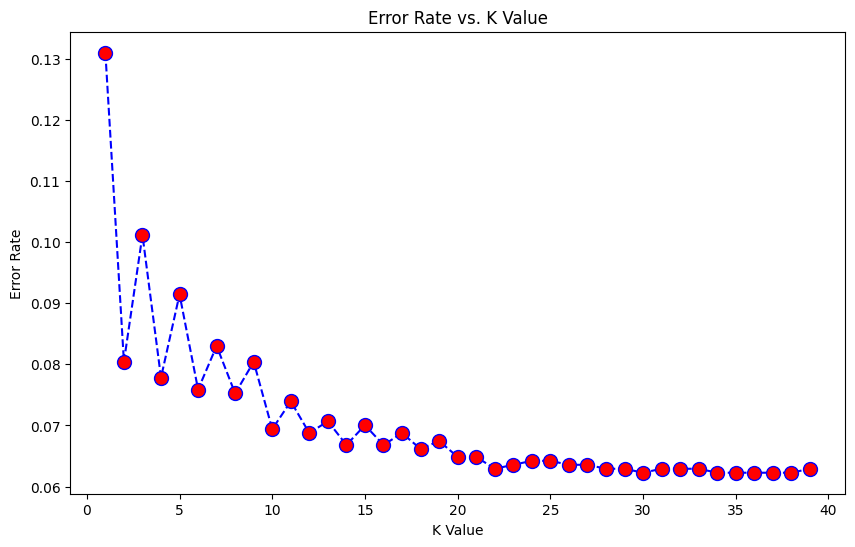

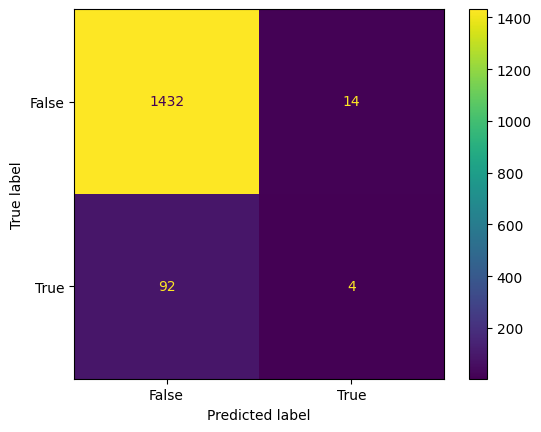

Accuracy: 0.9312581063553826
Precision: 0.2222222222222222
Recall: 0.041666666666666664
Specificity: 0.9903181189488244
F1_score: 0.07017543859649122


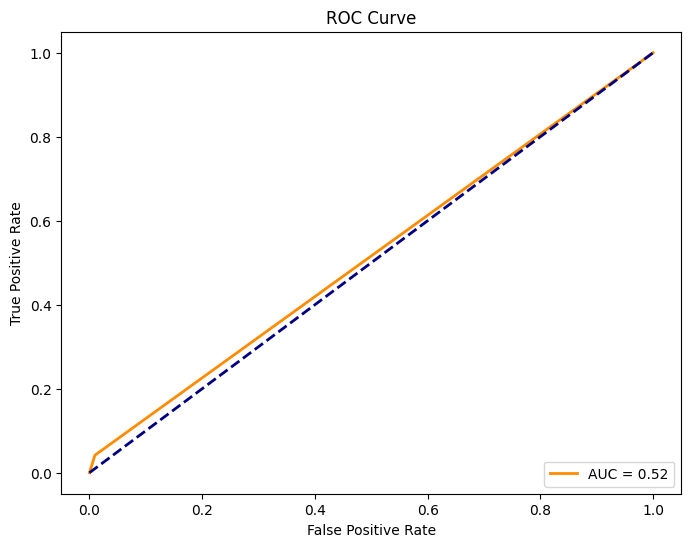

In [52]:
X_ncr, y_ncr = ncr(X_train, y_train)

error_rate = []

for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_ncr,y_ncr)
 pred_i = knn.predict(X_val)
 error_rate.append(np.mean(pred_i != y_val))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")


knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_ncr,y_ncr)
y_pred = knn.predict(X_val)

show_metrics(y_val,y_pred, 1, 0)

## Undersample + Hyperparameter Tuning

Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


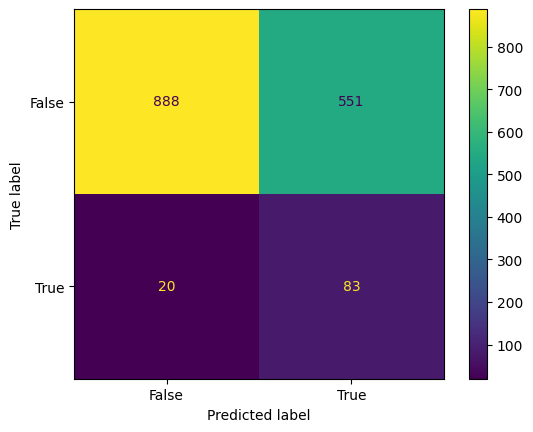

Accuracy: 0.6297016861219196
Precision: 0.1309148264984227
Recall: 0.8058252427184466
Specificity: 0.6170952050034746
F1_score: 0.22523744911804613


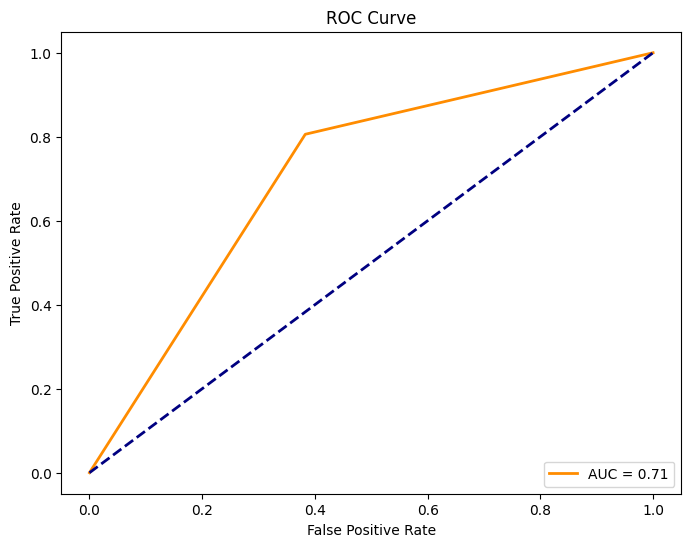

In [53]:
X_under, y_under = undersample(X_train, y_train)

param_grid = {'n_neighbors': np.arange(1, 11),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=5, scoring='recall')

grid.fit(X_under, y_under)

print("Best Hyperparameters:", grid.best_params_)

best_knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'],
                                 weights=grid.best_params_['weights'],
                                 algorithm=grid.best_params_['algorithm'],
                                 p=grid.best_params_['p'])
best_knn.fit(X_under, y_under)
y_pred = best_knn.predict(X_test)

show_metrics(y_test,y_pred, 1, 0)

## Deep Learning

In [54]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
from get_processed_data import get_processed_data
import seaborn as sns
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from sampling import undersample, oversample, smote, ncr
from show_metrics import show_metrics_DL
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, roc_curve, auc, confusion_matrix,
    roc_auc_score, precision_recall_curve
)
from feature_selection import forward_select, backward_select, rf_select

### Splitting data

In [55]:
df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()
# X_train.to_csv(r"C:\Users\760421\Downloads\P_FAILING_HEAD.csv", index=False)


Training set shape: (12335, 57) (12335,)
Validation set shape: (1542, 57) (1542,)
Test set shape: (1542, 57) (1542,)


In [56]:
def ann(optimizer='adam', activation='relu', dropout_rate=0.0, hidden_units=16, learning_rate=0.01):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model



def train_ann(X_train, y_train, X_test, y_test, sampling_technique):

    model = KerasClassifier(model=ann, optimizer='adam', activation='relu', dropout_rate=0.0, 
                            hidden_units=16, learning_rate=0.01, batch_size=32, epochs=30)
    # model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.1, 
    #                         hidden_units=32, learning_rate=0.1, batch_size=32, epochs=40)

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    Recall = round(recall_score(y_test, y_pred),3)
    Precision = round(precision_score(y_test, y_pred),3)
    f1 = round(f1_score(y_test, y_pred),3)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics





Epoch 1/30


386/386 [==============================] - 3s 3ms/step - loss: 0.2357 - accuracy: 0.9407
Epoch 2/30
386/386 [==============================] - 1s 3ms/step - loss: 0.2062 - accuracy: 0.9413
Epoch 3/30
386/386 [==============================] - 2s 4ms/step - loss: 0.1999 - accuracy: 0.9413
Epoch 4/30
386/386 [==============================] - 1s 4ms/step - loss: 0.1957 - accuracy: 0.9413
Epoch 5/30
386/386 [==============================] - 1s 3ms/step - loss: 0.1928 - accuracy: 0.9413
Epoch 6/30
386/386 [==============================] - 1s 3ms/step - loss: 0.1911 - accuracy: 0.9413
Epoch 7/30
386/386 [==============================] - 1s 3ms/step - loss: 0.1899 - accuracy: 0.9412
Epoch 8/30
386/386 [==============================] - 1s 3ms/step - loss: 0.1892 - accuracy: 0.9413
Epoch 9/30
386/386 [==============================] - 1s 2ms/step - loss: 0.1882 - accuracy: 0.9413
Epoch 10/30
386/386 [==============================] - 1s 2ms/step - loss: 0.1882 - accuracy: 0.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

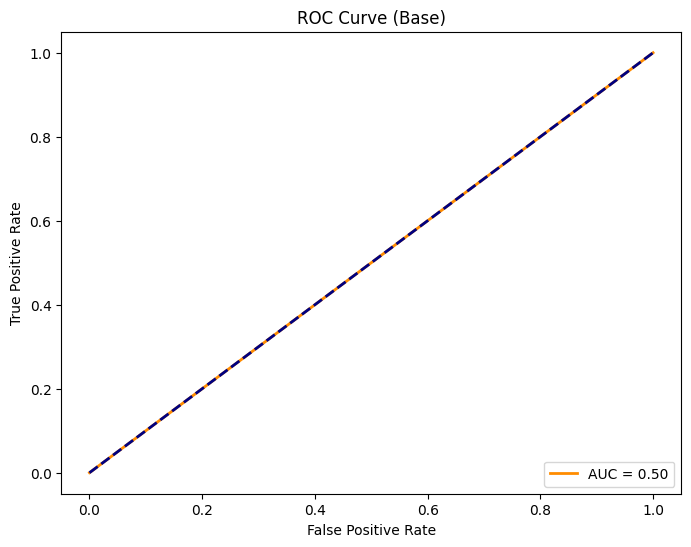

Epoch 1/30
726/726 [==============================] - 2s 2ms/step - loss: 0.5874 - accuracy: 0.6979
Epoch 2/30
726/726 [==============================] - 2s 2ms/step - loss: 0.5061 - accuracy: 0.7619
Epoch 3/30
726/726 [==============================] - 1s 2ms/step - loss: 0.4792 - accuracy: 0.7704
Epoch 4/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4609 - accuracy: 0.7808
Epoch 5/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4457 - accuracy: 0.7890
Epoch 6/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4324 - accuracy: 0.7980
Epoch 7/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4226 - accuracy: 0.8035
Epoch 8/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4134 - accuracy: 0.8077
Epoch 9/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4058 - accuracy: 0.8125
Epoch 10/30
726/726 [==============================] - 2s 3ms/step - loss: 0.3991 - accuracy: 0.8155

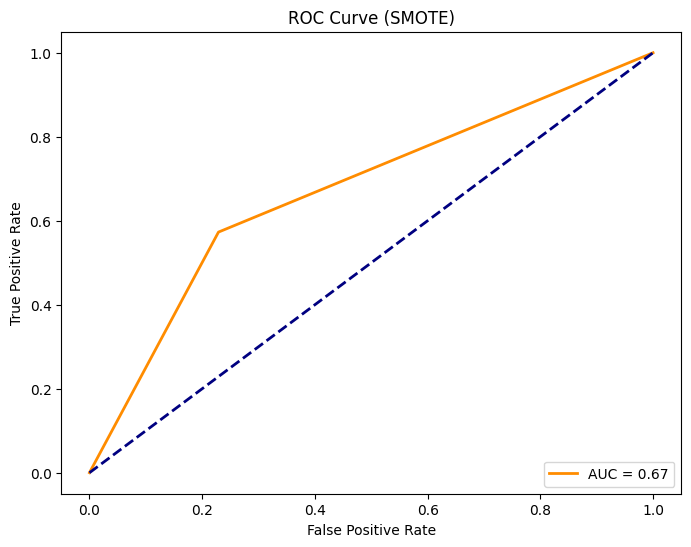

Epoch 1/30
726/726 [==============================] - 2s 2ms/step - loss: 0.5742 - accuracy: 0.7072
Epoch 2/30
726/726 [==============================] - 2s 3ms/step - loss: 0.5124 - accuracy: 0.7502
Epoch 3/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4916 - accuracy: 0.7590
Epoch 4/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4755 - accuracy: 0.7660
Epoch 5/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4619 - accuracy: 0.7774
Epoch 6/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4506 - accuracy: 0.7853
Epoch 7/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4426 - accuracy: 0.7917
Epoch 8/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4352 - accuracy: 0.7961
Epoch 9/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4286 - accuracy: 0.7976
Epoch 10/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4226 - accuracy: 0.8022

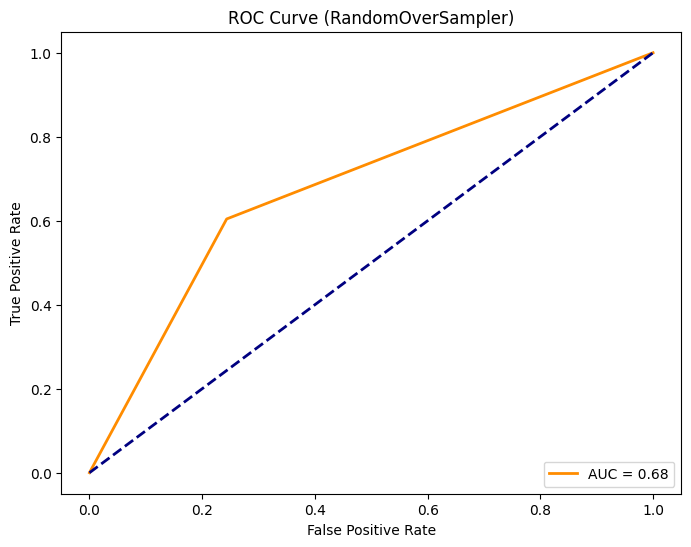

Epoch 1/30
46/46 [==============================] - 1s 3ms/step - loss: 0.7701 - accuracy: 0.5007
Epoch 2/30
46/46 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.5760
Epoch 3/30
46/46 [==============================] - 0s 3ms/step - loss: 0.6353 - accuracy: 0.6685
Epoch 4/30
46/46 [==============================] - 0s 3ms/step - loss: 0.6087 - accuracy: 0.6878
Epoch 5/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5887 - accuracy: 0.7065
Epoch 6/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5726 - accuracy: 0.7279
Epoch 7/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5591 - accuracy: 0.7279
Epoch 8/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5498 - accuracy: 0.7410
Epoch 9/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5415 - accuracy: 0.7479
Epoch 10/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5359 - accuracy: 0.7514
Epoch 11/30
46/46 [

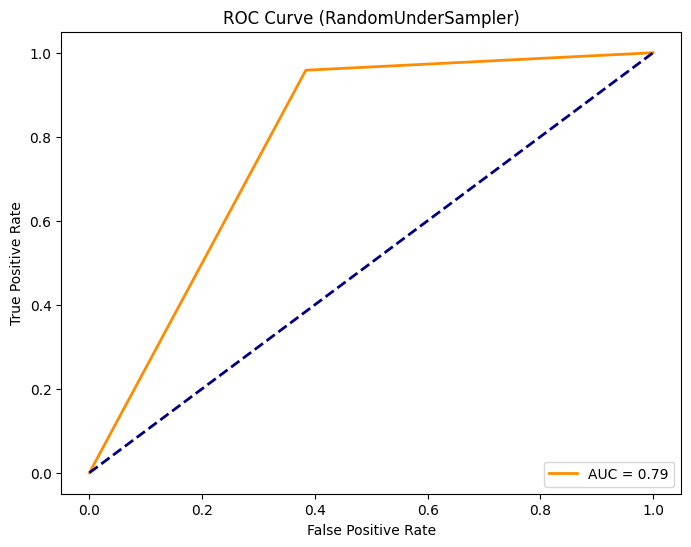

In [57]:
results={}

#No Sampling
metrics = train_ann(X_train, y_train, X_val,y_val,'Base')
results[metrics[0]] = metrics[1:]

#smote
X_smote, y_smote = smote(X_train, y_train)

metrics = train_ann(X_smote, y_smote, X_val,y_val,'SMOTE')
results[metrics[0]] = metrics[1:]

#oversampling
X_over, y_over = oversample(X_train, y_train)

metrics = train_ann(X_over, y_over, X_val,y_val,'RandomOverSampler')
results[metrics[0]] = metrics[1:]

#undersampling
X_under, y_under = undersample(X_train, y_train)

metrics = train_ann(X_under, y_under, X_val,y_val,'RandomUnderSampler')
results[metrics[0]] = metrics[1:]



In [58]:
features = rf_select(X_train, y_train)
X_train_rf = X_train[features]
X_val_rf = X_val[features]
X_test_rf = X_test[features]
print(X_train_rf.shape)
print(y_train.shape)


31 features selected: Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make_Honda', 'Make_Toyota',
       'Make_Mazda', 'Make_Chevrolet', 'Make_Pontiac', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus_Single', 'MaritalStatus_Married', 'Age', 'Fault',
       'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy_Liability', 'BasePolicy_All Perils', 'Weekend'],
      dtype='object')
(12335, 31)
(12335,)


In [59]:
def ann_rf(optimizer='adam', activation='relu', dropout_rate=0.0, hidden_units=16, learning_rate=0.01):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units, activation=activation, input_shape=(X_train_rf.shape[1],)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_ann_rf(X_train, y_train, X_test, y_test, sampling_technique):

    model = KerasClassifier(model=ann_rf, optimizer='adam', activation='relu', dropout_rate=0.0, 
                            hidden_units=16, learning_rate=0.01, batch_size=32, epochs=30)
    # model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.1, 
    #                         hidden_units=32, learning_rate=0.1, batch_size=32, epochs=40)

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    Recall = round(recall_score(y_test, y_pred),3)
    Precision = round(precision_score(y_test, y_pred),3)
    f1 = round(f1_score(y_test, y_pred),3)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics

Epoch 1/30


386/386 [==============================] - 2s 3ms/step - loss: 0.2353 - accuracy: 0.9407
Epoch 2/30
386/386 [==============================] - 1s 2ms/step - loss: 0.2069 - accuracy: 0.9413
Epoch 3/30
386/386 [==============================] - 1s 3ms/step - loss: 0.1992 - accuracy: 0.9413
Epoch 4/30
386/386 [==============================] - 1s 3ms/step - loss: 0.1954 - accuracy: 0.9413
Epoch 5/30
386/386 [==============================] - 1s 2ms/step - loss: 0.1932 - accuracy: 0.9413
Epoch 6/30
386/386 [==============================] - 1s 3ms/step - loss: 0.1920 - accuracy: 0.9413
Epoch 7/30
386/386 [==============================] - 1s 3ms/step - loss: 0.1912 - accuracy: 0.9413
Epoch 8/30
386/386 [==============================] - 1s 2ms/step - loss: 0.1906 - accuracy: 0.9413
Epoch 9/30
386/386 [==============================] - 1s 2ms/step - loss: 0.1903 - accuracy: 0.9413
Epoch 10/30
386/386 [==============================] - 1s 3ms/step - loss: 0.1896 - accuracy: 0.9413
Epoch 11/3

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

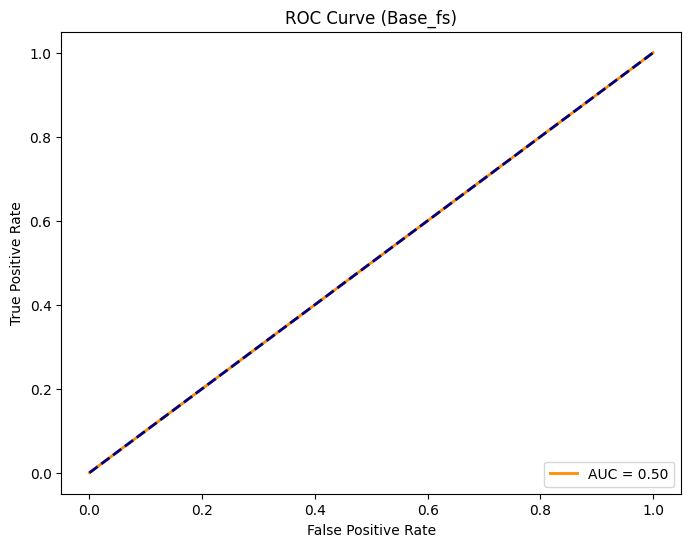

Epoch 1/30
726/726 [==============================] - 3s 3ms/step - loss: 0.5805 - accuracy: 0.7079
Epoch 2/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4987 - accuracy: 0.7569
Epoch 3/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4866 - accuracy: 0.7633
Epoch 4/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4779 - accuracy: 0.7660
Epoch 5/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4692 - accuracy: 0.7718
Epoch 6/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4635 - accuracy: 0.7759
Epoch 7/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4581 - accuracy: 0.7785
Epoch 8/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4539 - accuracy: 0.7812
Epoch 9/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4502 - accuracy: 0.7842
Epoch 10/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4472 - accuracy: 0.7864

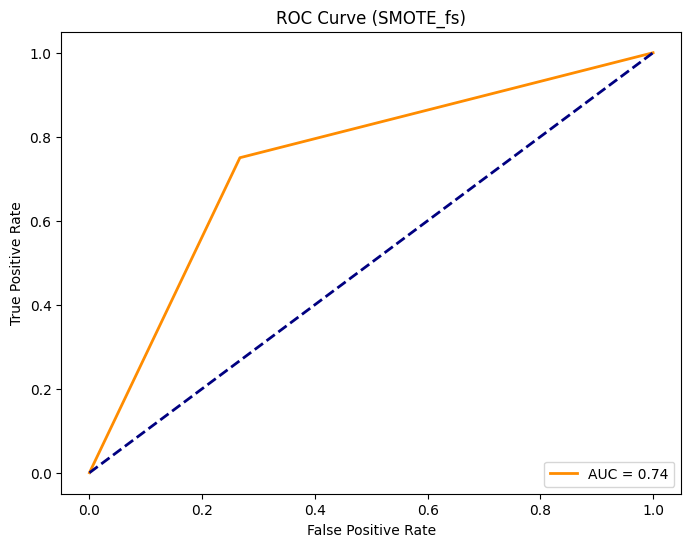

Epoch 1/30
726/726 [==============================] - 3s 2ms/step - loss: 0.5765 - accuracy: 0.7038
Epoch 2/30
726/726 [==============================] - 2s 3ms/step - loss: 0.5176 - accuracy: 0.7493
Epoch 3/30
726/726 [==============================] - 2s 3ms/step - loss: 0.5094 - accuracy: 0.7515
Epoch 4/30
726/726 [==============================] - 2s 3ms/step - loss: 0.5025 - accuracy: 0.7535
Epoch 5/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4943 - accuracy: 0.7594
Epoch 6/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4837 - accuracy: 0.7684
Epoch 7/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4745 - accuracy: 0.7716
Epoch 8/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4672 - accuracy: 0.7768
Epoch 9/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4608 - accuracy: 0.7781
Epoch 10/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4553 - accuracy: 0.7827

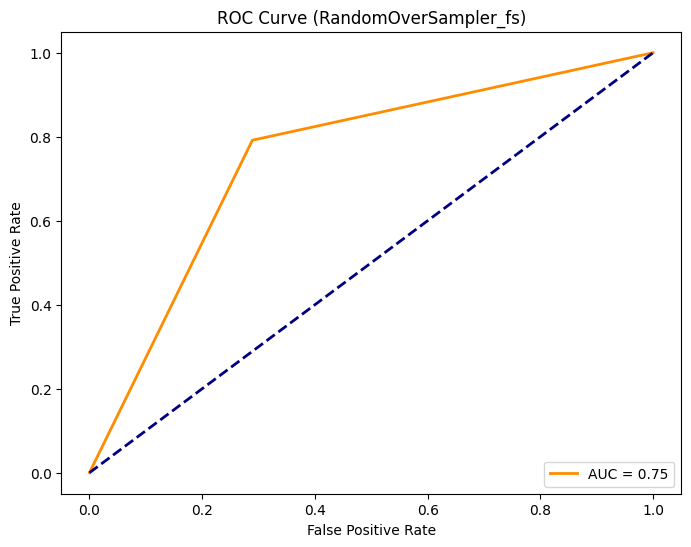

Epoch 1/30
46/46 [==============================] - 2s 4ms/step - loss: 0.7086 - accuracy: 0.5407
Epoch 2/30
46/46 [==============================] - 0s 3ms/step - loss: 0.6537 - accuracy: 0.5994
Epoch 3/30
46/46 [==============================] - 0s 3ms/step - loss: 0.6191 - accuracy: 0.6602
Epoch 4/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5894 - accuracy: 0.6802
Epoch 5/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5680 - accuracy: 0.7023
Epoch 6/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5549 - accuracy: 0.7258
Epoch 7/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5411 - accuracy: 0.7390
Epoch 8/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5341 - accuracy: 0.7438
Epoch 9/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5245 - accuracy: 0.7541
Epoch 10/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5219 - accuracy: 0.7535
Epoch 11/30
46/46 [

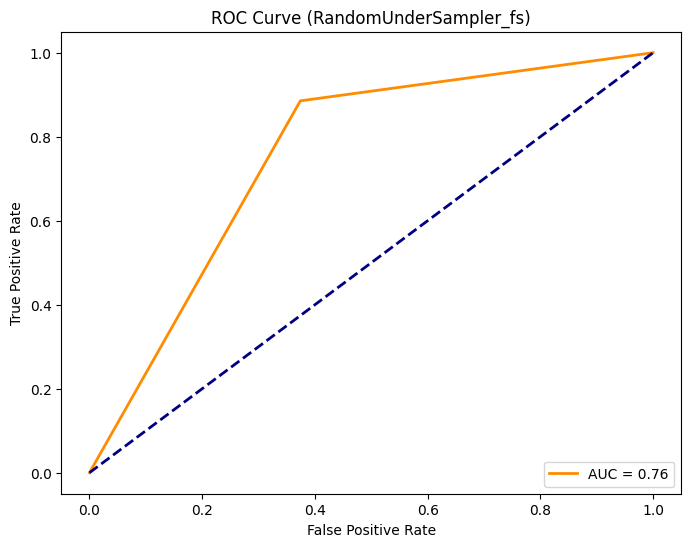

In [60]:
# results={}
#base
metrics = train_ann_rf(X_train_rf, y_train, X_val_rf,y_val,'Base_fs')
results[metrics[0]] = metrics[1:]

#smote
X_smote_rf, y_smote_rf = smote(X_train_rf, y_train)

metrics = train_ann_rf(X_smote_rf, y_smote_rf, X_val_rf,y_val,'SMOTE_fs')
results[metrics[0]] = metrics[1:]

#oversampling
X_over_rf, y_over_rf = oversample(X_train_rf, y_train)

metrics = train_ann_rf(X_over_rf, y_over_rf, X_val_rf,y_val,'RandomOverSampler_fs')
results[metrics[0]] = metrics[1:]

#undersampling
X_under_rf, y_under_rf = undersample(X_train_rf, y_train)

metrics = train_ann_rf(X_under_rf, y_under_rf, X_val_rf,y_val,'RandomUnderSampler_fs')
results[metrics[0]] = metrics[1:]



In [61]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['Recall','F1 Score', 'Precision',  'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
RandomUnderSampler,0.958,0.142,0.248,0.637
RandomUnderSampler_fs,0.885,0.136,0.235,0.642
RandomOverSampler_fs,0.792,0.154,0.258,0.716
SMOTE_fs,0.750,0.157,0.260,0.734
RandomOverSampler,0.604,0.141,0.229,0.747
SMOTE,0.573,0.142,0.228,0.759
Base,0.000,0.000,0.000,0.938
Base_fs,0.000,0.000,0.000,0.938


### Hyper-Parameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score

model = KerasClassifier(model=ann, optimizer="adam", epochs=30, batch_size=32, verbose=0,activation = "relu", 
                        dropout_rate=0,hidden_units=16, learning_rate=0.01)

# Define the hyperparameters to tune
param_grid = {
    'optimizer': ['adam'],  # Optimizer choices
    'activation': ['relu', 'sigmoid'],  # Activation functions
    'hidden_units': [8, 16, 32],  # Number of neurons in the hidden layer(s)
    'learning_rate': [0.001, 0.01, 0.1],  # Learning rate for the optimizer
    'batch_size': [32],  # Batch size for training
    'epochs': [30],  # Number of training epochs
    'dropout_rate': [0.0, 0.1, 0.2],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(recall_score), cv=3)
grid_result = grid.fit(X_under, y_under)
best_hyper = grid_result.best_params_
print("Without Feature Selection, Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Without Feature Selection, Best: 0.897774 using {'activation': 'sigmoid', 'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 30, 'hidden_units': 8, 'learning_rate': 0.001, 'optimizer': 'adam'}


In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score


model_fs = KerasClassifier(model=ann_rf, optimizer="adam", epochs=30, batch_size=32, verbose=0,activation = "relu", 
                        dropout_rate=0,hidden_units=16, learning_rate=0.01)

# Define the hyperparameters to tune
param_grid_fs = {
    'optimizer': ['adam'],  # Optimizer choices
    'activation': ['relu', 'sigmoid'],  # Activation functions
    'hidden_units': [8, 16, 32],  # Number of neurons in the hidden layer(s)
    'learning_rate': [0.001, 0.01, 0.1],  # Learning rate for the optimizer
    'batch_size': [32],  # Batch size for training
    'epochs': [30],  # Number of training epochs
    'dropout_rate': [0.0, 0.1, 0.2],
}

grid_fs = GridSearchCV(estimator=model_fs, param_grid=param_grid_fs, scoring=make_scorer(recall_score), cv=3)
grid_result_fs = grid_fs.fit(X_under_rf, y_under_rf)
best_hyper_fs = grid_result_fs.best_params_
print("With feature Selection, Best: %f using %s" % (grid_result_fs.best_score_, grid_result_fs.best_params_))


With feature Selection, Best: 0.888115 using {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.1, 'epochs': 30, 'hidden_units': 32, 'learning_rate': 0.01, 'optimizer': 'adam'}


```Function to apply ANN Tuned model on test data (No Feature Selection)```

In [64]:

def train_ann_tuned(X_train, y_train, X_test, y_test, sampling_technique,class_weights=None,param_grid=None):


    model = KerasClassifier(model=ann, **best_hyper)
    
    model.fit(X_train, y_train, class_weight=class_weights)
   
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    Recall = round(recall_score(y_test, y_pred),3)
    Precision = round(precision_score(y_test, y_pred),3)
    f1 = round(f1_score(y_test, y_pred),3)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics

```Function to apply ANN Tuned model on test data (With Feature Selection)```

In [65]:
def train_ann_tuned_fs(X_train, y_train, X_test, y_test, sampling_technique,class_weights=None,param_grid=None):

   
    model = KerasClassifier(model=ann_rf, **best_hyper_fs)
    
    
    model.fit(X_train, y_train, class_weight=class_weights)
   
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    Recall = round(recall_score(y_test, y_pred),3)
    Precision = round(precision_score(y_test, y_pred),3)
    f1 = round(f1_score(y_test, y_pred),3)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics

#### Apply tuned model to training sets 

Epoch 1/30


46/46 [==============================] - 1s 3ms/step - loss: 0.7258 - accuracy: 0.5035
Epoch 2/30
46/46 [==============================] - 0s 3ms/step - loss: 0.7063 - accuracy: 0.4952
Epoch 3/30
46/46 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.5421
Epoch 4/30
46/46 [==============================] - 0s 3ms/step - loss: 0.6818 - accuracy: 0.5663
Epoch 5/30
46/46 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.5849
Epoch 6/30
46/46 [==============================] - 0s 3ms/step - loss: 0.6611 - accuracy: 0.6153
Epoch 7/30
46/46 [==============================] - 0s 3ms/step - loss: 0.6569 - accuracy: 0.6271
Epoch 8/30
46/46 [==============================] - 0s 3ms/step - loss: 0.6512 - accuracy: 0.6492
Epoch 9/30
46/46 [==============================] - 0s 3ms/step - loss: 0.6422 - accuracy: 0.6464
Epoch 10/30
46/46 [==============================] - 0s 3ms/step - loss: 0.6397 - accuracy: 0.6395
Epoch 11/30
46/46 [===========

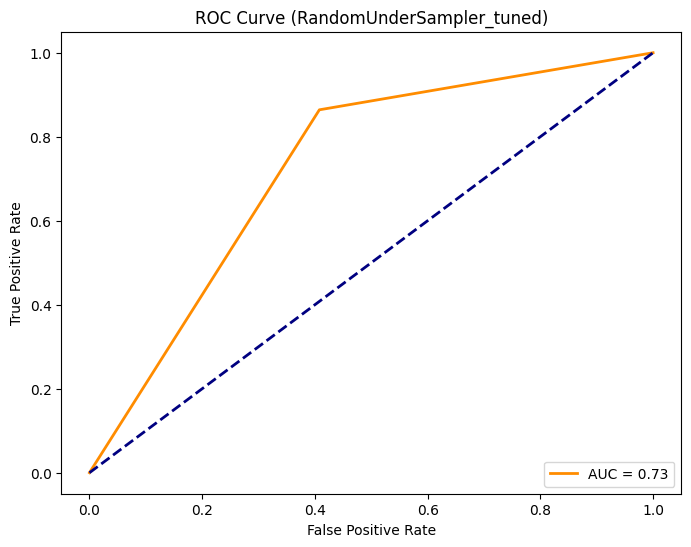

Epoch 1/30
46/46 [==============================] - 1s 3ms/step - loss: 0.6856 - accuracy: 0.5552
Epoch 2/30
46/46 [==============================] - 0s 3ms/step - loss: 0.6507 - accuracy: 0.6464
Epoch 3/30
46/46 [==============================] - 0s 3ms/step - loss: 0.6226 - accuracy: 0.6789
Epoch 4/30
46/46 [==============================] - 0s 3ms/step - loss: 0.6007 - accuracy: 0.7189
Epoch 5/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5791 - accuracy: 0.7272
Epoch 6/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5662 - accuracy: 0.7217
Epoch 7/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5475 - accuracy: 0.7376
Epoch 8/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5353 - accuracy: 0.7535
Epoch 9/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5212 - accuracy: 0.7528
Epoch 10/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5226 - accuracy: 0.7410
Epoch 11/30
46/46 [

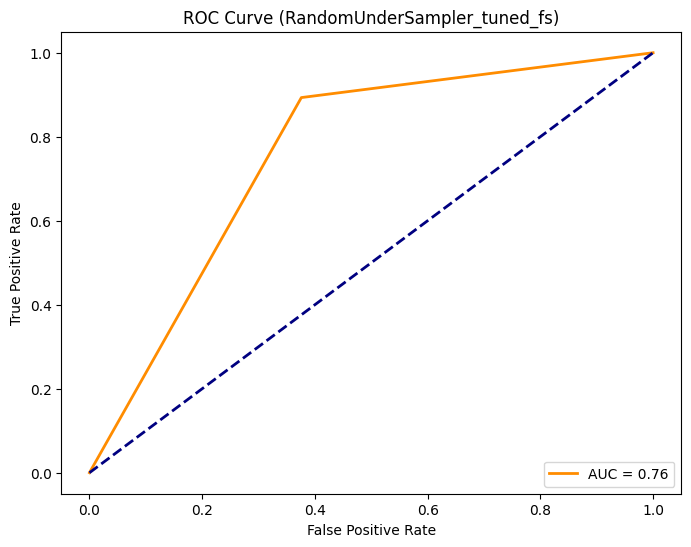

In [66]:

#undersampling
results={}

X_under, y_under = undersample(X_train, y_train)

metrics = train_ann_tuned(X_under, y_under, X_test, y_test,'RandomUnderSampler_tuned')
results[metrics[0]] = metrics[1:]

X_under_fs, y_under_fs = undersample(X_train_rf, y_train)

metrics = train_ann_tuned_fs(X_under_fs, y_under_fs, X_test_rf, y_test,'RandomUnderSampler_tuned_fs')
results[metrics[0]] = metrics[1:]


In [67]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['Recall','F1 Score', 'Precision', 'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
RandomUnderSampler_tuned_fs,0.893,0.145,0.250,0.642
RandomUnderSampler_tuned,0.864,0.132,0.228,0.610


## Few shot learning

Given the limited amount of positive (fraudulent) data points available, we explored few-shot learning, which is a method that specialises in training with small training data. We implemented a classifier using prototypical networks as the underlying architecture. 

We hypothesized that a few shot classifier would be able to perform comparably to the previous supervised leraning models, while using less samples. To validate this, we will evaluate the classifier's performance on different values of k, where k is the number of examples of each class that is seen by the model during training.

Set up

In [70]:
import warnings

from get_processed_data import get_processed_data
from FSLMethods import form_datasets
from FSLTrainer import FSLTrainer
from show_metrics import show_metrics

warnings.filterwarnings('ignore')

### Preparing data

Train-Test-Validation split

In [71]:
df, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()


Training set shape: (12335, 57) (12335,)
Validation set shape: (1542, 57) (1542,)
Test set shape: (1542, 57) (1542,)


### Model training (meta-learning / episodic training)

Episodic training simulates the few-shot learning scenario to train a prototypical network. Training data is organized into episodes that resemble few-shot tasks.

Firstly, we determine whether to do feature selection, which method to sample with (if any), and what size the embedding of the prototypical network should be. k is initialized as a constant 10.

In [72]:
config_1 = {
    'n_shot': [10],
    'embedding_size': [2 ** x for x in range(2, 6)] ## Try {4, 8, 16, 32}
}
results_1 = {} ## key:value = (feature_selection, sampling_method):(recall, f1-score)
idx = 0

for feature_selection in [True, False]:
    for sampling_method in ['', 'oversampling', 'undersampling', 'smote']:
        print(f'##### Run {idx} #####')
        print(f'Feature selection: {feature_selection}, sampling method: {sampling_method}')
        train_set, validation_set, test_set = \
            form_datasets(X_train, y_train, X_val, y_val, X_test, y_test, 
                          feature_selection = feature_selection, sampling_method = sampling_method)
        trainer_1 = FSLTrainer(train_set, validation_set, test_set, config_1)

        curr_results, best_config = trainer_1.tune(metric = 'recall')
        print(f'Precision: {curr_results[best_config][0].precision}, F1: {curr_results[best_config][0].f1_score}, AUC: {curr_results[best_config][0].auc}')
        idx += 1
        # print(f'Results: Recall = {curr_results[best_config][0]}, best embedding size = {best_config[1]}')

##### Run 0 #####
Feature selection: True, sampling method: 
32 features selected: Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make_Honda', 'Make_Toyota',
       'Make_Mazda', 'Make_Chevrolet', 'Make_Pontiac', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus_Single', 'MaritalStatus_Married', 'Age', 'Fault',
       'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy_Liability', 'BasePolicy_Collision', 'BasePolicy_All Perils',
       'Weekend'],
      dtype='object')
Training 10-shot classifier with size 4 embedding... ...
Training 10-shot classifier with size 8 embedding... ...
Training 10-shot classifier with size 16 embedding... ...
Training 10-shot classifier with size 32 embedding... ...
########### Tuning complete ###########
Best trial config: k = 10, em

From the above results, the best recall was obtained by the model that used feature selection and sampling with SMOTE, and had an embedding size of 8 (ie the feature extractor of the prototypical network embeds inputs into vectors of size 8). We will now experiment with various values of k.

In [73]:
train_set, validation_set, test_set = \
    form_datasets(X_train, y_train, X_val, y_val, X_test, y_test, 
                  feature_selection = True, sampling_method = 'smote')

config_2 = {
    'n_shot': [4, 8, 16, 24, 32, 48, 64],
    'embedding_size': [32]
}

trainer_2 = FSLTrainer(train_set, validation_set, test_set, config_2)
results, best_config = trainer_2.tune(metric = 'recall') ## Key:Value = (k, embedding_size):(metric, model_params)

7 features selected: Index(['Month', 'MonthClaimed', 'Age', 'Fault', 'RepNumber',
       'BasePolicy_Liability', 'Fraud'],
      dtype='object')
Training 4-shot classifier with size 32 embedding... ...
Training 8-shot classifier with size 32 embedding... ...
Training 16-shot classifier with size 32 embedding... ...
Training 24-shot classifier with size 32 embedding... ...
Training 32-shot classifier with size 32 embedding... ...
Training 48-shot classifier with size 32 embedding... ...
Training 64-shot classifier with size 32 embedding... ...
########### Tuning complete ###########
Best trial config: k = 64, embedding size = 32
Best trial validation recall: 0.929


Thus, we will take the optimal k to be 48, and the optimal embedding size to be 8. 

### Model evaluation

We will now determine the minimum k required to match the performance of the supervised learning models. This is done by evaluating the previously trained models on the testing set. Based on the performance of our other models, a threshold of 0.75 for the recall has been set.

100%|██████████| 100/100 [00:04<00:00, 23.33it/s, f1=0.722, recall=0.791]


Minimum k required to match performance threshold = 4


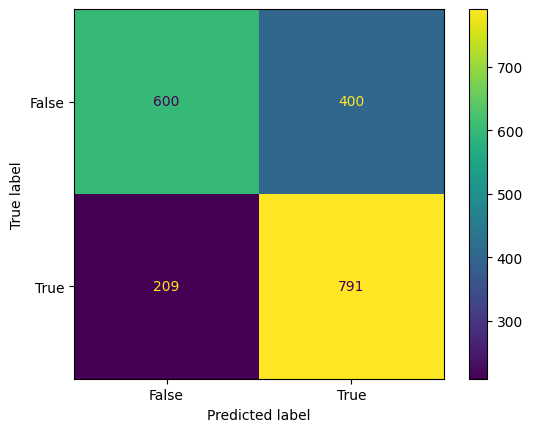

Accuracy: 0.6955
Precision: 0.6641477749790092
Recall: 0.791
Specificity: 0.6
F1_score: 0.7220447284345048


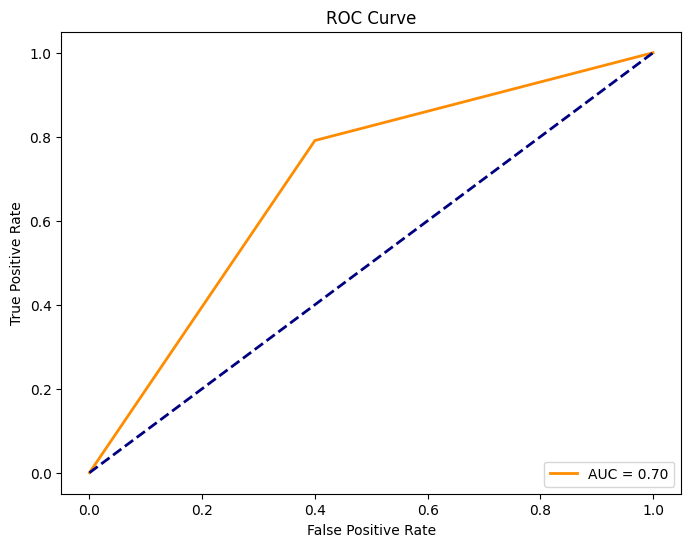

In [74]:
## Get trained models for each k
threshold = 0.7
temp_list = [(k, embedding_size, metric, model_params) for (k, embedding_size), (metric, model_params) in results.items()]
temp_list = sorted(temp_list, key = lambda x: x[0])

relevant_actuals = []
relevant_predictions = []

for curr_k, curr_size, _, curr_params in temp_list:
    curr_config = {
        'n_shot': curr_k,
        'embedding_size': curr_size
    }
    test_metrics = trainer_2.test(curr_params, curr_config)
    if test_metrics.recall > threshold:
        print(f'Minimum k required to match performance threshold = {curr_k}')
        show_metrics(actual = test_metrics.actuals, predicted = test_metrics.predictions, pos_label = 1, neg_label = 0)
        break